In [2]:
# What is the dataset about?
# Here 4 most popular datasets in English: Crema, Ravdess, Savee and Tess. Each of them contains audio in .wav format with some main labels.
# *Ravdess:
# Here is the filename identifiers as per the official RAVDESS website:
# Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
# Vocal channel (01 = speech, 02 = song).
# Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
# Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
# Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
# Repetition (01 = 1st repetition, 02 = 2nd repetition).
# Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).
# *So, here's an example of an audio filename. 02-01-06-01-02-01-12.wav This means the meta data for the audio file is:
# Video-only (02)
# Speech (01)
# Fearful (06)
# Normal intensity (01)
# Statement "dogs" (02)
# 1st Repetition (01)
# 12th Actor (12) - Female (as the actor ID number is even)
# *Crema:
# The third component is responsible for the emotion label:
# SAD - sadness;
# ANG - angry;
# DIS - disgust;
# FEA - fear;
# HAP - happy;
# NEU - neutral.
# *Tess:
# Very similar to Crema - label of emotion is contained in the name of file.
# *Savee:
# The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
# 'a' = 'anger'
# 'd' = 'disgust'
# 'f' = 'fear'
# 'h' = 'happiness'
# 'n' = 'neutral'
# 'sa' = 'sadness'
# 'su' = 'surprise'

In [3]:
# Why LSTM for Speech Recognition?

# Long Short-Term Memory (LSTM) networks are particularly useful for speech recognition due to their ability to model sequential dependencies effectively. 
# Unlike traditional feedforward neural networks, LSTMs can retain context information over longer time spans, making them well-suited for capturing the 
# temporal patterns present in speech signals. By learning from past observations and adjusting their internal states, LSTMs can handle variable-length 
# input sequences, adapt to different speech speeds, and extract relevant features for accurate recognition. Their robustness to time delays and 
# capacity to capture long-range dependencies contribute to their state-of-the-art performance in this domain.

In [4]:
pip install librosa

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [6]:
Root_dir = 'C:/Users/Samruddhi/Desktop/codealpha/speech_emotion_detection'

In [7]:
Crema_path = Root_dir + "/Crema/" 
Ravdess_path = Root_dir + "/Ravdess/audio_speech_actors_01-24/"
Savee_path = Root_dir + "/Savee/"
Tess_path = Root_dir + "/Tess/"

In [8]:
Crema_dir_list = os.listdir(Crema_path)
Ravdess_dir_list = os.listdir(Ravdess_path)
Savee_dir_list = os.listdir(Savee_path)
Tess_dir_list = os.listdir(Tess_path)

In [9]:
Ex_Crema_dir_list = Crema_dir_list[:15]
Ex_Crema_dir_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav']

In [10]:
emotions_crema = []
paths_crema = []

for it in Crema_dir_list:
    # storing file paths
    paths_crema.append(Crema_path + it)
    # storing file emotions
    part = it.split('_')
    if part[2] == 'SAD':
        emotions_crema.append('sad')
    elif part[2] == 'ANG':
        emotions_crema.append('angry')
    elif part[2] == 'DIS':
        emotions_crema.append('disgust')
    elif part[2] == 'FEA':
        emotions_crema.append('fear')
    elif part[2] == 'HAP':
        emotions_crema.append('happy')
    elif part[2] == 'NEU':
        emotions_crema.append('neutral')
    else:
        emotions_crema.append('Unknown')
        
# dataframe for emotion of files
emotions_crema_df = pd.DataFrame(emotions_crema, columns=['Emotions'])

# dataframe for path of files.
path_crema_df = pd.DataFrame(paths_crema, columns=['Path'])
Crema_df = pd.concat([emotions_crema_df, path_crema_df], axis=1)
print(Crema_df.shape)
Crema_df.head()

(7442, 2)


,Emotions,Path
0,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
1,disgust,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
2,fear,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
3,happy,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
4,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...


In [11]:
[Crema_df["Emotions"].unique().tolist() for i in Crema_df.columns]

[['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad'],
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad']]

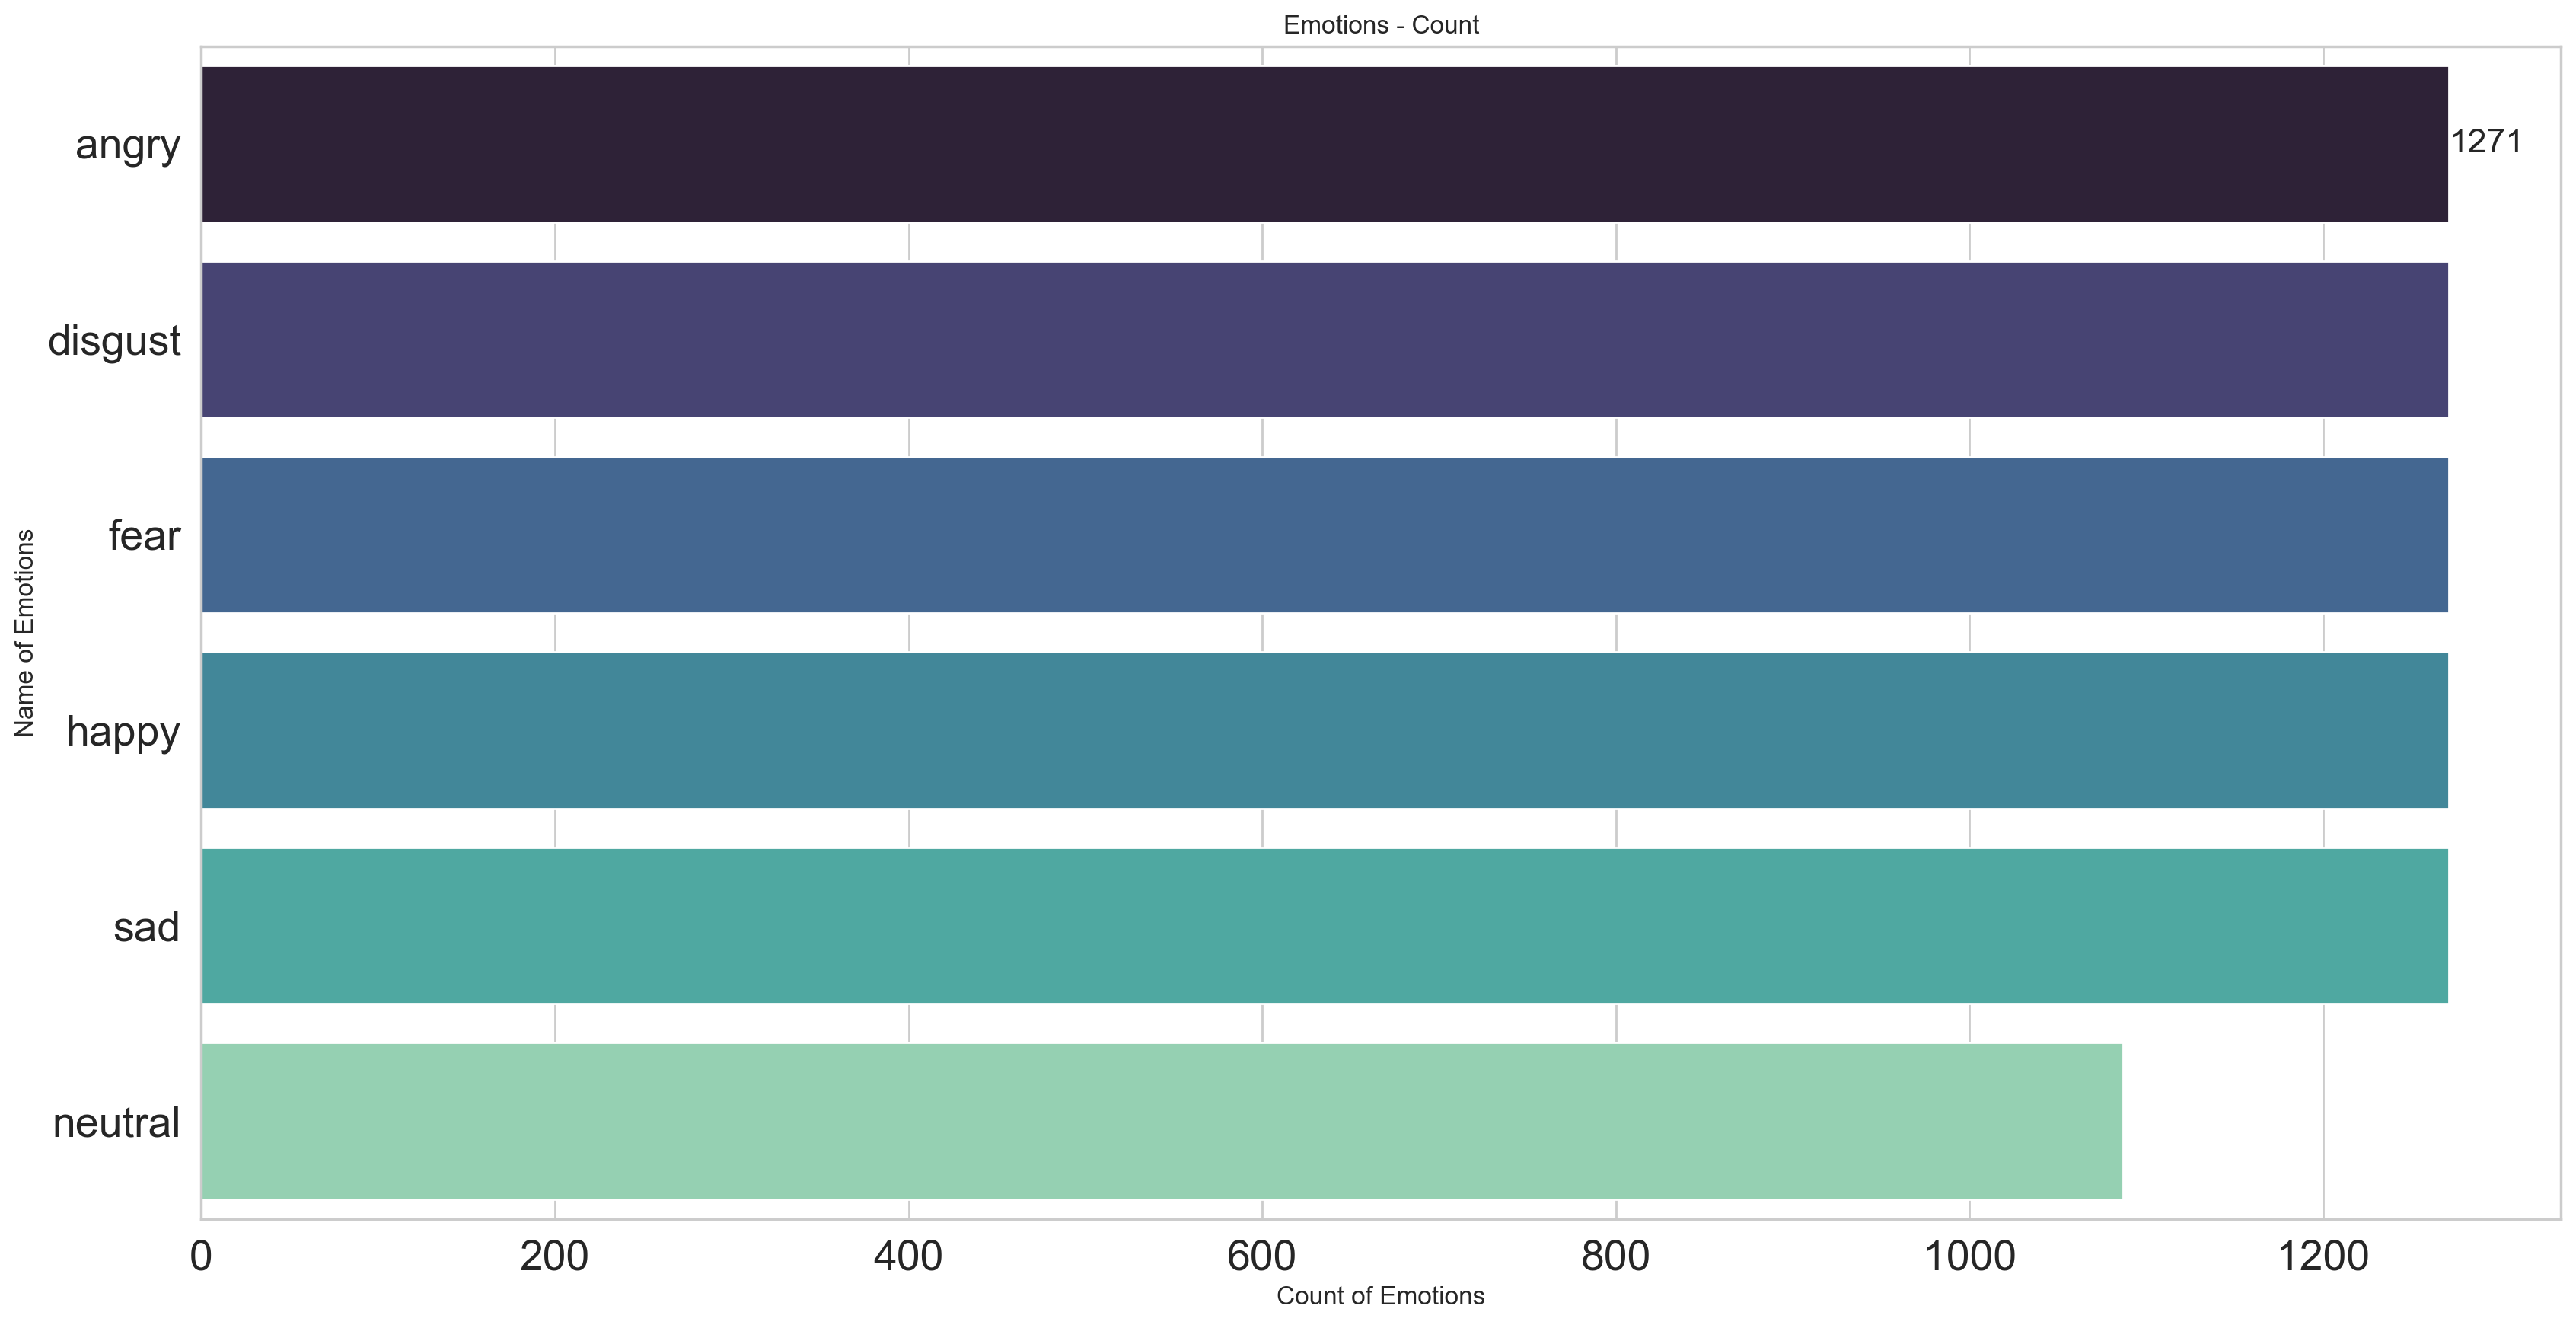

In [12]:
sns.set_theme(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Crema_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [13]:
Ex_Ravdess_dir_list = Ravdess_dir_list[:15]
Ex_Ravdess_dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15']

In [14]:
emotions_ravdess = []
path_ravdess = []

for it in Ravdess_dir_list:
    # There are 20 actors  
    actor = os.listdir(Ravdess_path + it)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotions_ravdess.append(int(part[2]))
        path_ravdess.append(Ravdess_path + it + '/' + file)
    
    
emotion_ravdess_df = pd.DataFrame(emotions_ravdess, columns=['Emotions'])

path_ravdess_df = pd.DataFrame(path_ravdess, columns=['Path'])
Ravdess_df = pd.concat([emotion_ravdess_df, path_ravdess_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm',
                             3:'happy', 4:'sad', 5:'angry',
                             6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
1,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
2,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
3,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
4,calm,C:/Users/Samruddhi/Desktop/codealpha/speech_em...


In [15]:

[Ravdess_df["Emotions"].unique().tolist() for i in Ravdess_df.columns]

[['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise'],
 ['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust', 'surprise']]

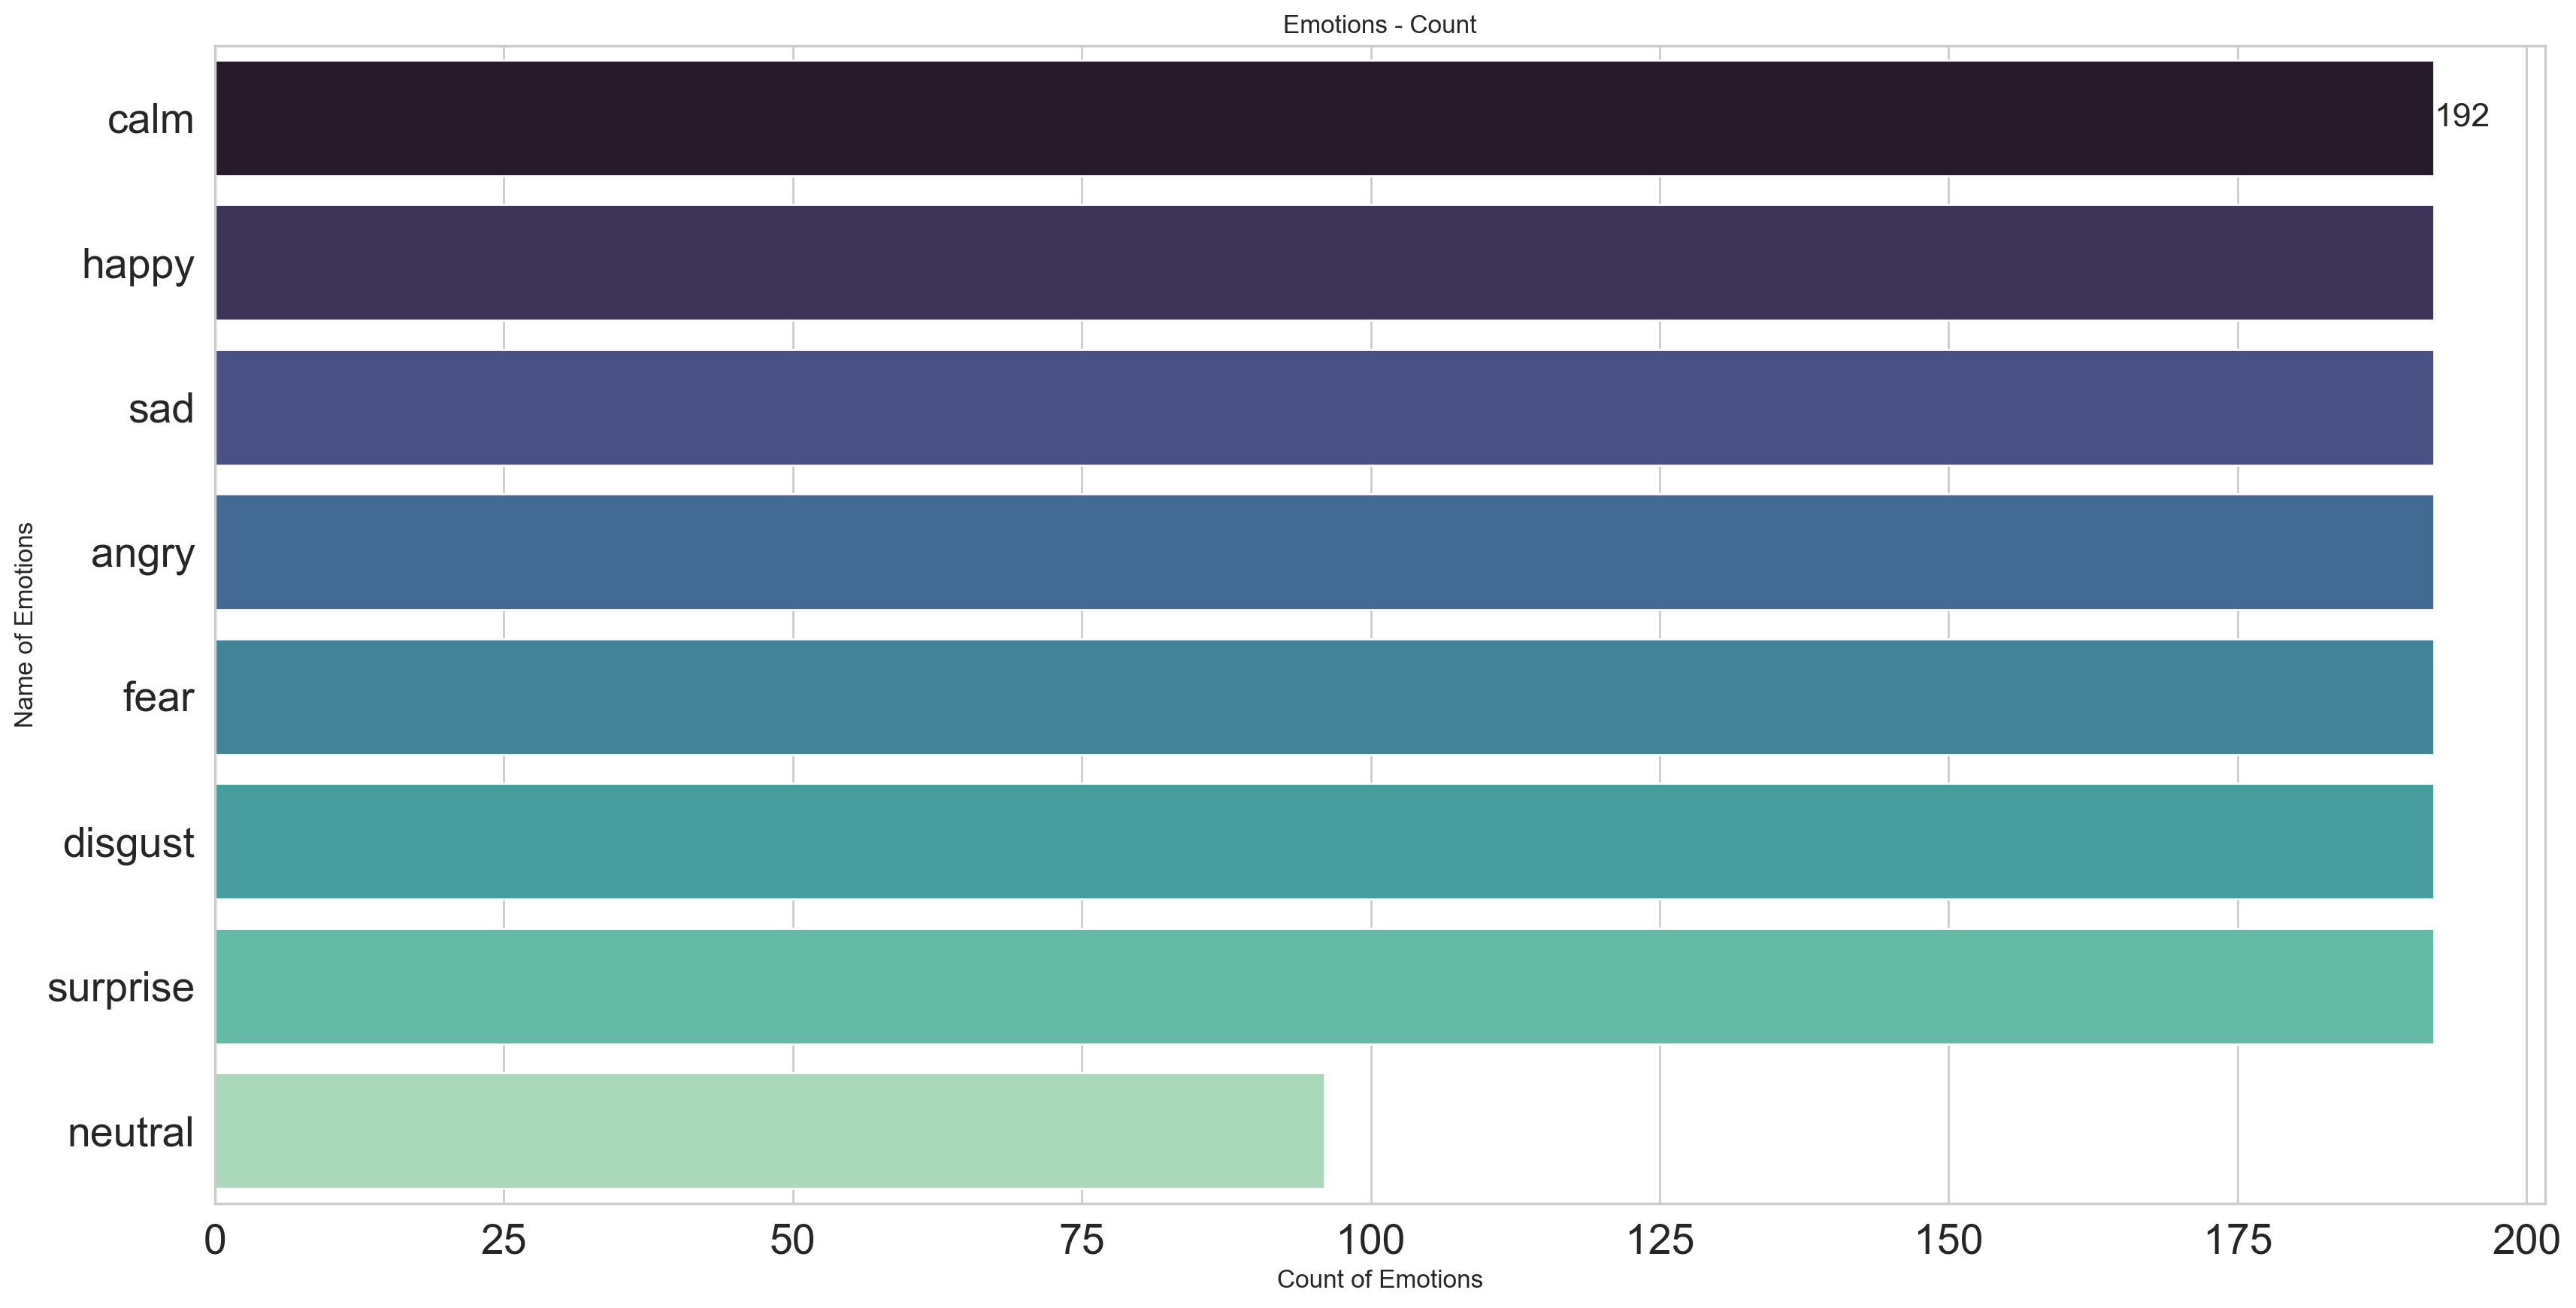

In [16]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Ravdess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [17]:
Ex_Savee_dir_list = Savee_dir_list[:15]
Ex_Savee_dir_list

['DC_a01.wav',
 'DC_a02.wav',
 'DC_a03.wav',
 'DC_a04.wav',
 'DC_a05.wav',
 'DC_a06.wav',
 'DC_a07.wav',
 'DC_a08.wav',
 'DC_a09.wav',
 'DC_a10.wav',
 'DC_a11.wav',
 'DC_a12.wav',
 'DC_a13.wav',
 'DC_a14.wav',
 'DC_a15.wav']

In [18]:
emotions_savee = []
path_savee = []

for it in Savee_dir_list:
    path_savee.append(Savee_path + it)
    part = it.split('_')[1]
    part = part[:-6]
    if part == 'a':
        emotions_savee.append('angry')
    elif part == 'd':
        emotions_savee.append('disgust')
    elif part == 'f':
        emotions_savee.append('fear')
    elif part == 'h':
        emotions_savee.append('happiness')
    elif part == 'n':
        emotions_savee.append('neutral')
    elif part == 'sa':
        emotions_savee.append('sadness')
    elif part == 'su':
        emotions_savee.append('surprise')
        
    else:
        emotions_savee.append('Unknown')
        
# dataframe for emotion of files
emotion_savee_df = pd.DataFrame(emotions_savee, columns=['Emotions'])

# dataframe for path of files.
path_savee_df = pd.DataFrame(path_savee, columns=['Path'])
Savee_df = pd.concat([emotion_savee_df, path_savee_df], axis=1)
Savee_df.head()

,Emotions,Path
0,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
1,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
2,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
3,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
4,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...


In [19]:
[Savee_df["Emotions"].unique().tolist() for i in Savee_df.columns]

[['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise'],
 ['angry', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']]

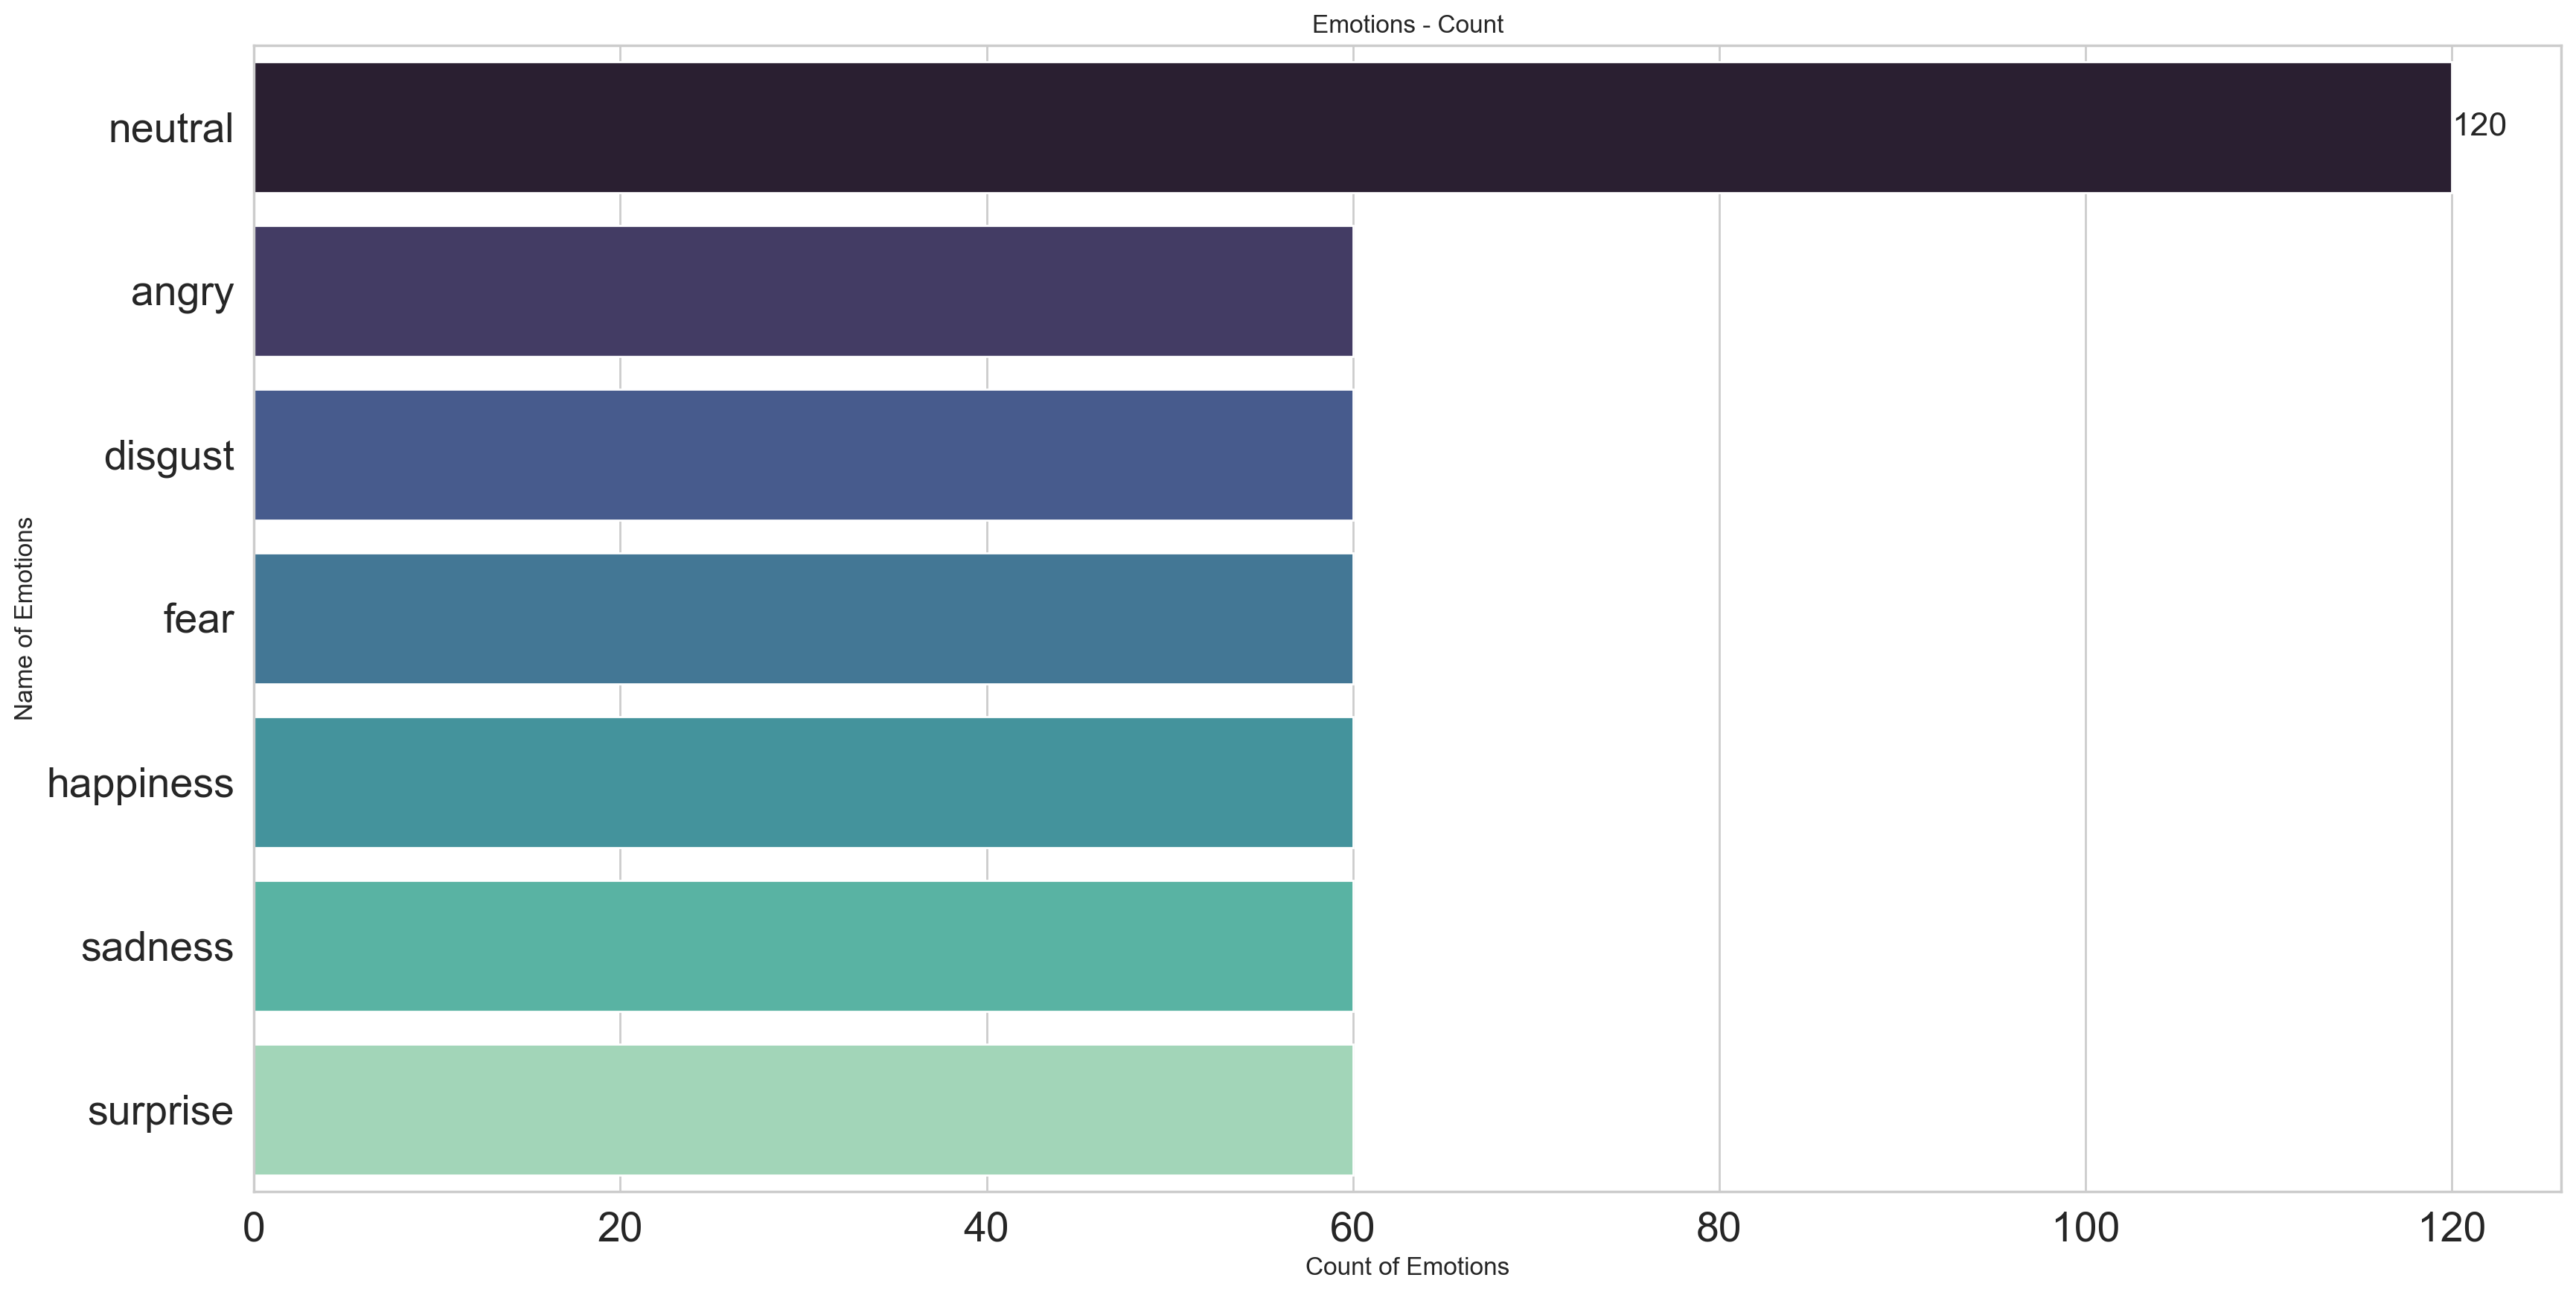

In [20]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Savee_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [21]:
Ex_Tess_dir_list = Tess_dir_list[:15]
Ex_Tess_dir_list

['OAF_angry',
 'OAF_disgust',
 'OAF_Fear',
 'OAF_happy',
 'OAF_neutral',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [22]:
emotions_tess = []
path_tess = []

for it in Tess_dir_list:
    directories = os.listdir(Tess_path + '/' + it)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            emotions_tess.append('surprise')
        else:
            emotions_tess.append(part)
        path_tess.append(Tess_path + it + '/' + file)
        
        
        
# dataframe for emotion of files
emotion_tess_df = pd.DataFrame(emotions_tess, columns=['Emotions'])

# dataframe for path of files.
path_tess_df = pd.DataFrame(path_tess, columns=['Path'])
Tess_df = pd.concat([emotion_tess_df, path_tess_df], axis=1)
Tess_df.head()

,Emotions,Path
0,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
1,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
2,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
3,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
4,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...


In [23]:
[Tess_df["Emotions"].unique().tolist() for i in Tess_df.columns]

[['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad'],
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'surprise', 'sad']]

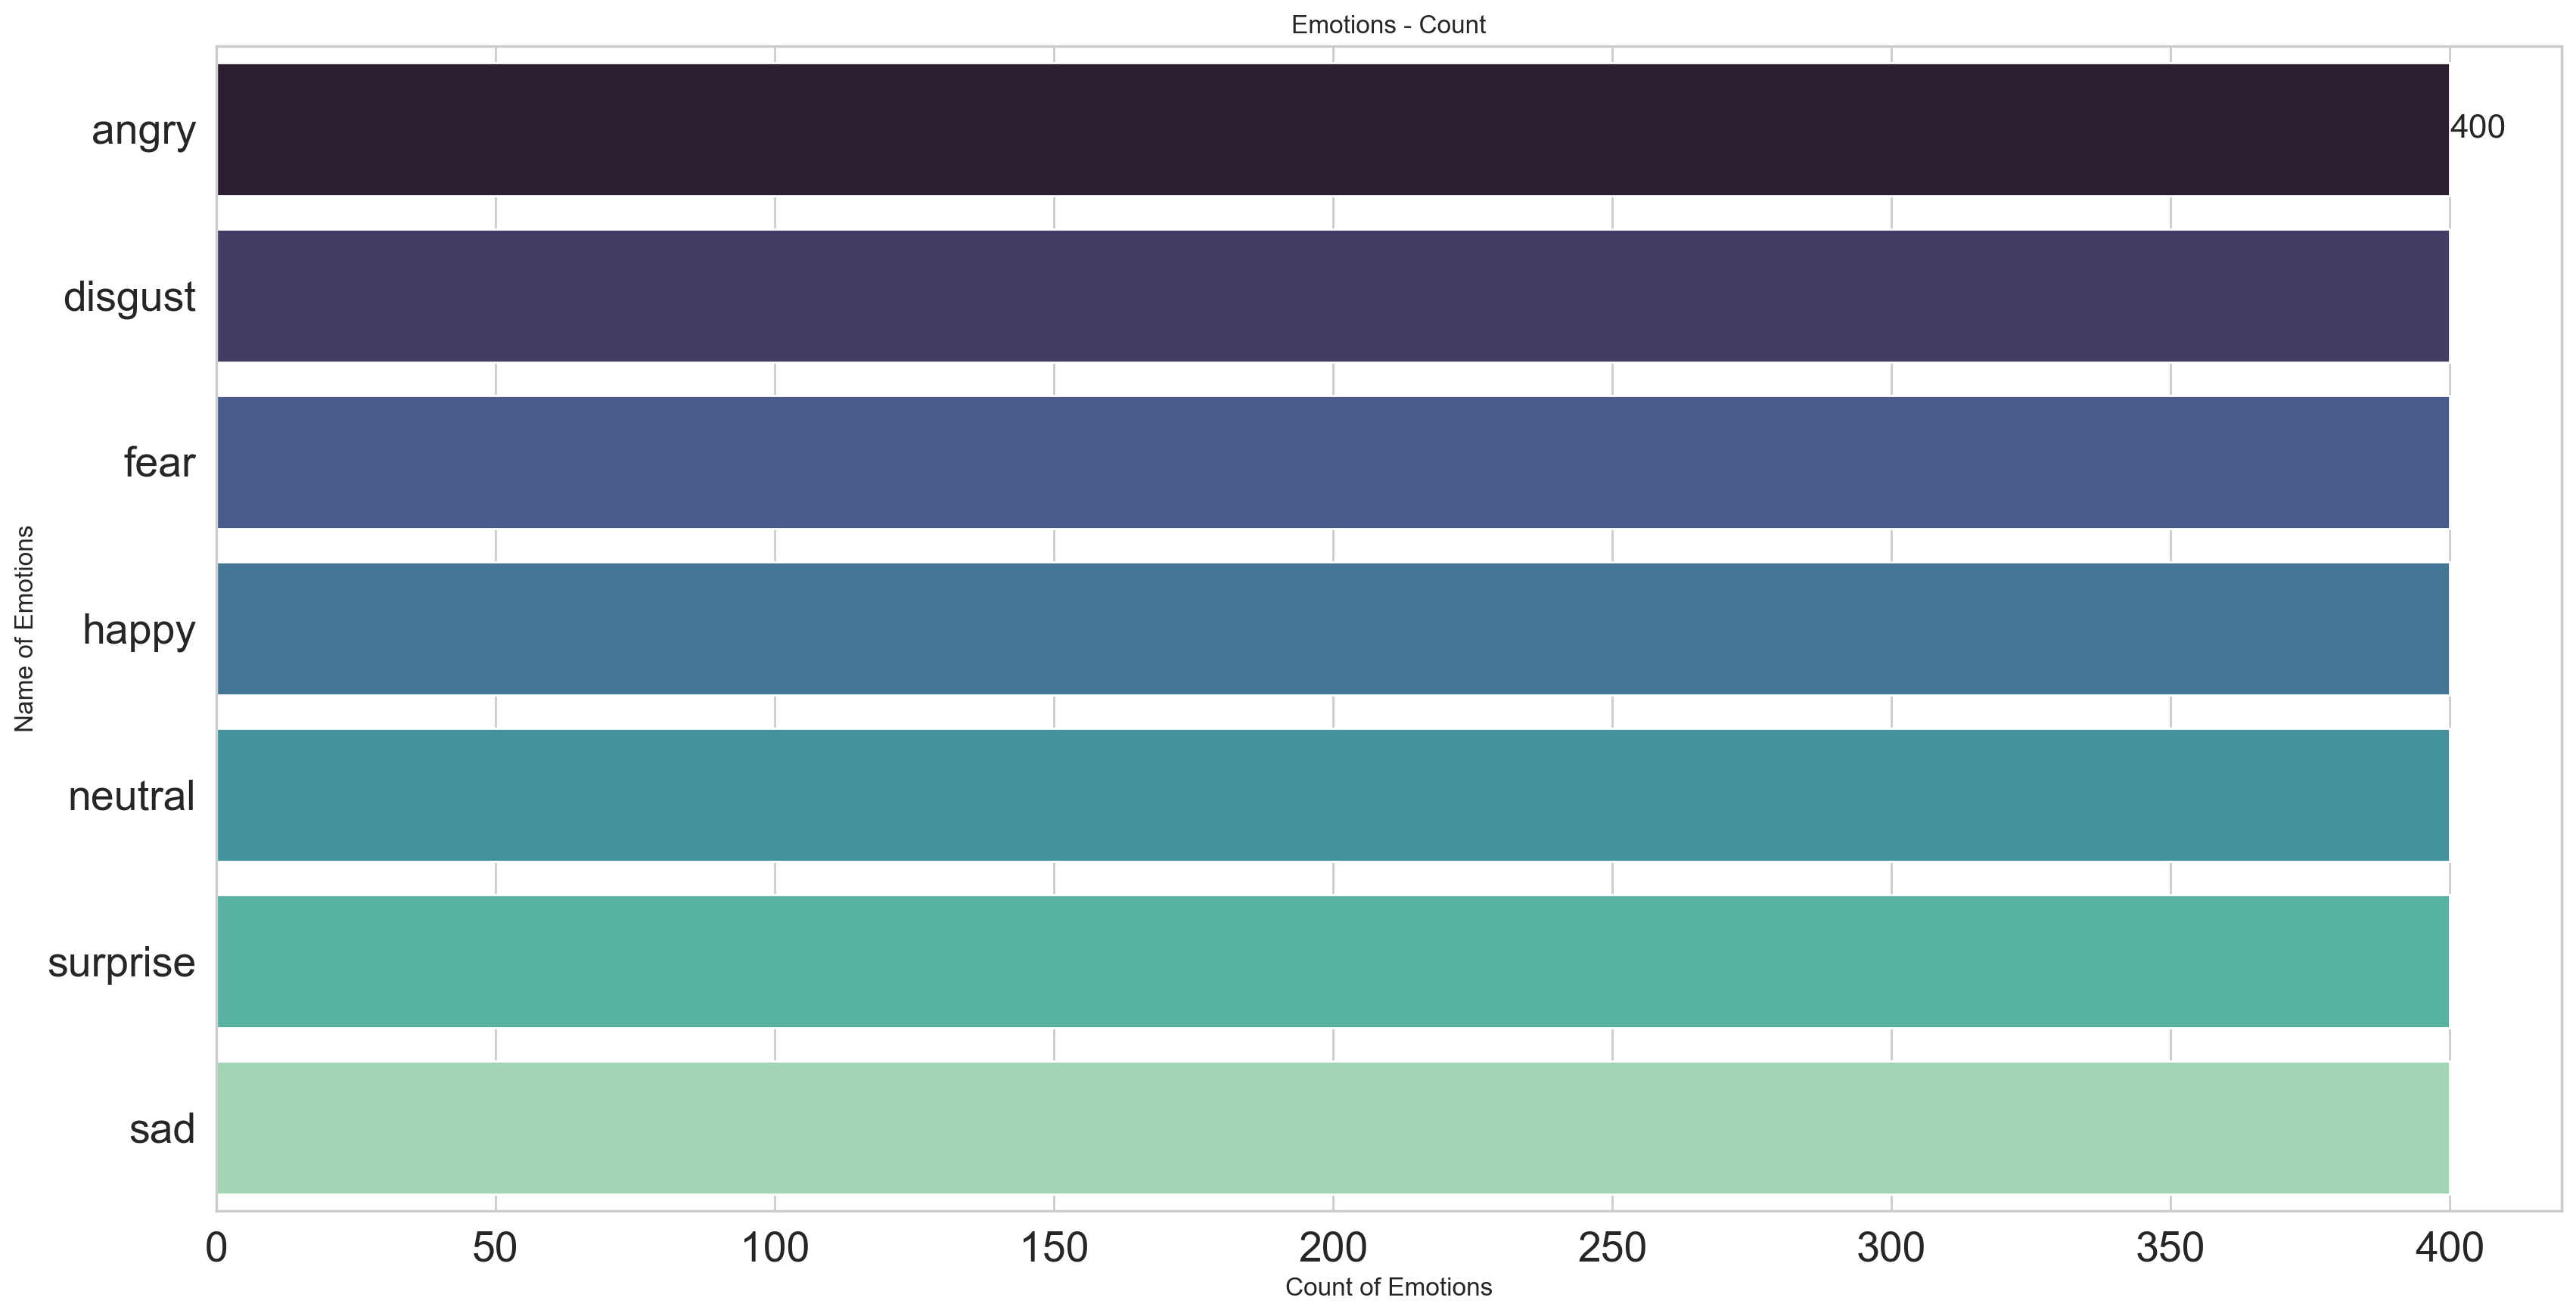

In [24]:
[['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy'],
 ['fear', 'angry', 'disgust', 'neutral', 'sad', 'surprise', 'happy']]
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Tess_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [25]:
Sum_df = pd.concat([Crema_df, Ravdess_df, Savee_df, Tess_df], axis = 0)
Sum_df.to_csv("Sum_df.csv",index=False)
Sum_df.head()

,Emotions,Path
0,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
1,disgust,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
2,fear,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
3,happy,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
4,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...


In [26]:
[Sum_df["Emotions"].unique().tolist() for i in Sum_df.columns]

[['angry',
  'disgust',
  'fear',
  'happy',
  'neutral',
  'sad',
  'calm',
  'surprise',
  'happiness',
  'sadness'],
 ['angry',
  'disgust',
  'fear',
  'happy',
  'neutral',
  'sad',
  'calm',
  'surprise',
  'happiness',
  'sadness']]

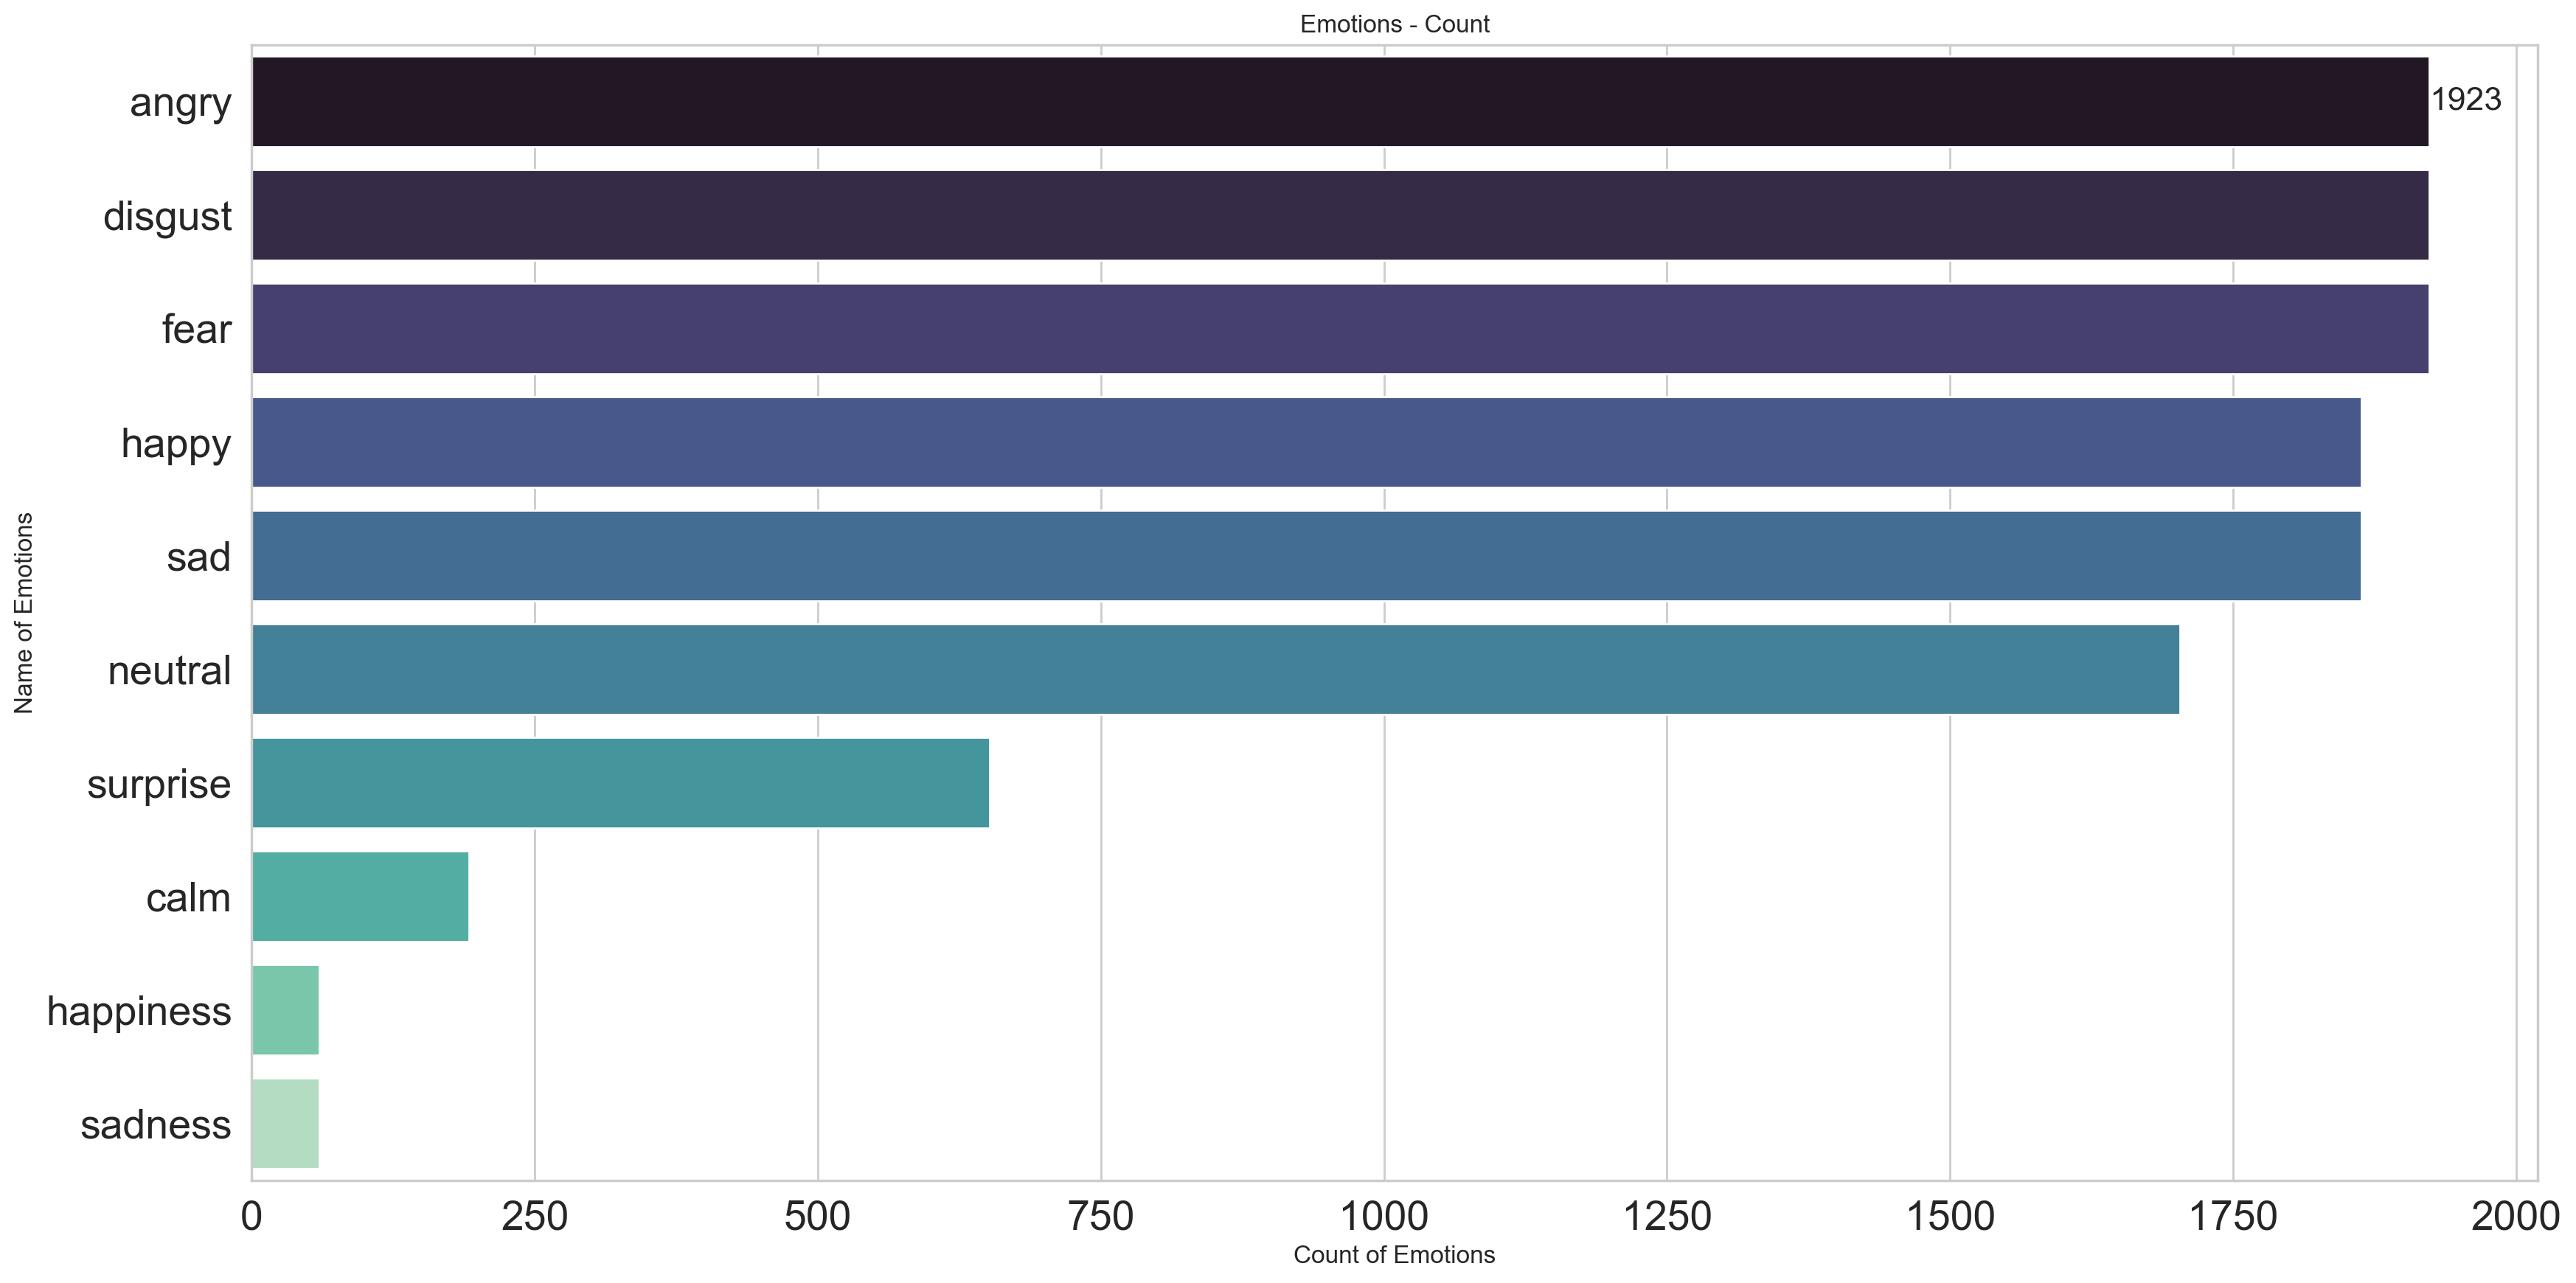

In [27]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

In [28]:
Sum_df_rep = Sum_df
Sum_df_rep['Emotions'].replace('happiness', 'happy', inplace=True)
Sum_df_rep['Emotions'].replace('sadness', 'sad', inplace=True)
Sum_df_rep['Emotions'].replace('calm', 'neutral', inplace=True)

In [29]:
[Sum_df_rep["Emotions"].unique().tolist() for i in Sum_df_rep.columns]


[['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
 ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']]

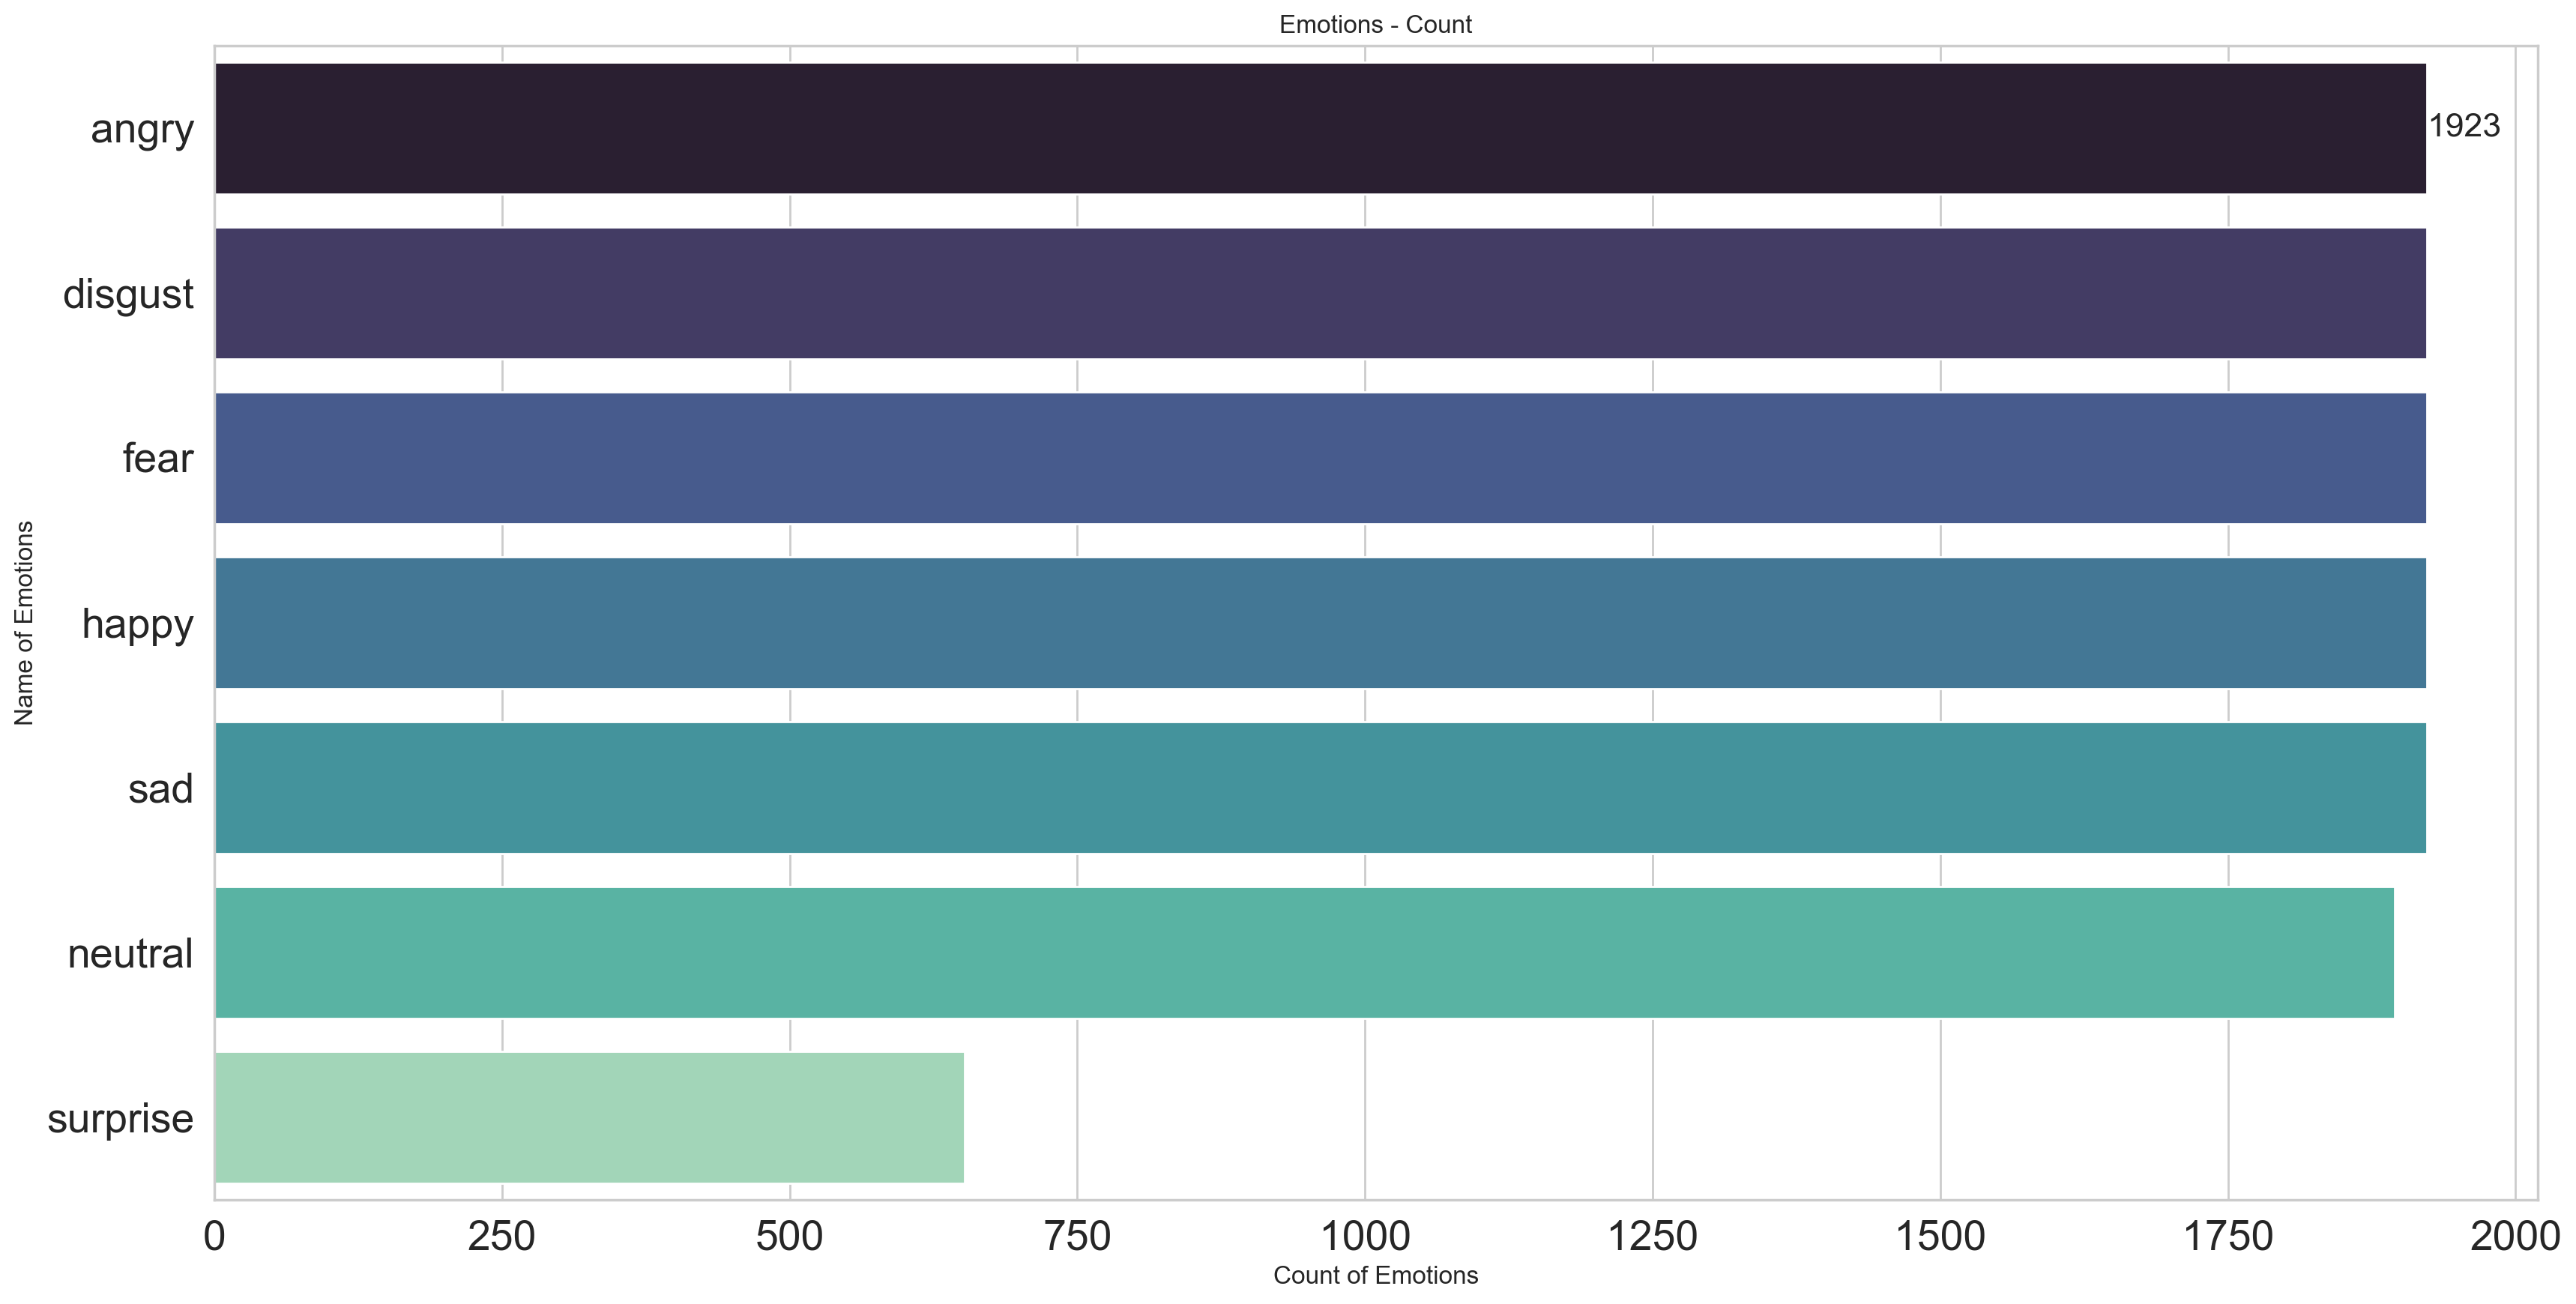

In [30]:
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(20,10),dpi=200)
Count_emotion = Sum_df_rep['Emotions'].value_counts()[:]
ax = sns.barplot(x= Count_emotion, y= Count_emotion.index, palette="mako")
ax.bar_label(ax.containers[0],fontsize=16)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Name of Emotions")
plt.xlabel("Count of Emotions")
plt.title("Emotions - Count")
plt.show()

Waveplot

Waveforms are essential representations of speech signals, capturing the pressure variations that travel through the air. However, when analyzing speech, we often need to focus on specific segments or phonemes within the signal. This is where the Short-Time Fourier Transform (STFT) becomes valuable.

Quantization: audio-to-digital conversion
 In digital audio, an anlog-to-digital converter captures thousands of audio samples per second at a specified sample rate and bit depth to reconstruct the original signal. The higher the sample rate and bit depth, the higher the audio resolution.

Sample rate is the number of samples per second that are taken of a waveform to create a discrete digital signal. 

In [31]:
%%time
audio_arrays = []

for i in Sum_df_rep['Path']:
    y, sr = librosa.load(i, sr=44100)
    audio_arrays.append(y)
    
Sum_df_rep['Arrays'] = audio_arrays

CPU times: total: 11.5 s
Wall time: 1min 51s


In [32]:
Sum_df_rep.head()

,Emotions,Path,Arrays
0,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...,"[6.9185524e-10, 8.411215e-10, 5.0900356e-10, 4..."
1,disgust,C:/Users/Samruddhi/Desktop/codealpha/speech_em...,"[0.00083351025, 0.0011382565, 0.0012377766, 0...."
2,fear,C:/Users/Samruddhi/Desktop/codealpha/speech_em...,"[0.007539533, 0.009629492, 0.008980679, 0.0084..."
3,happy,C:/Users/Samruddhi/Desktop/codealpha/speech_em...,"[-0.0039882455, -0.004723385, -0.0038926, -0.0..."
4,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...,"[0.0022234665, 0.002518577, 0.001856927, 0.001..."


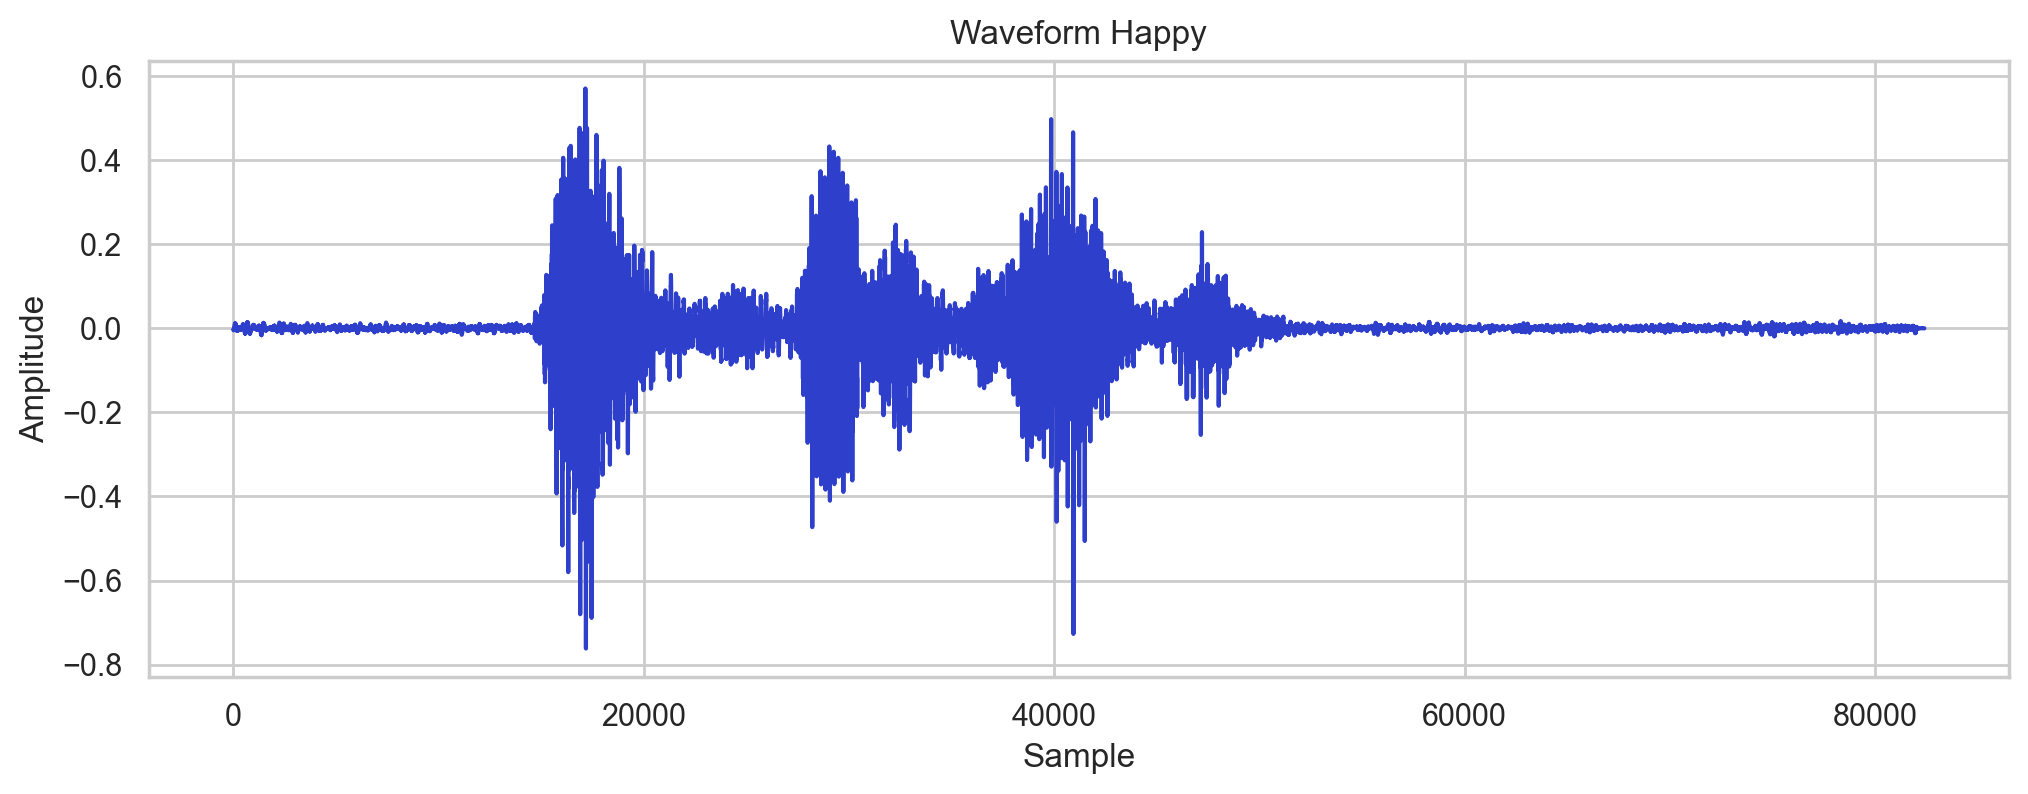

In [33]:
happy_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Path']
happy_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'happy']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Happy')
plt.show()

Audio(happy_sp.iloc[0])

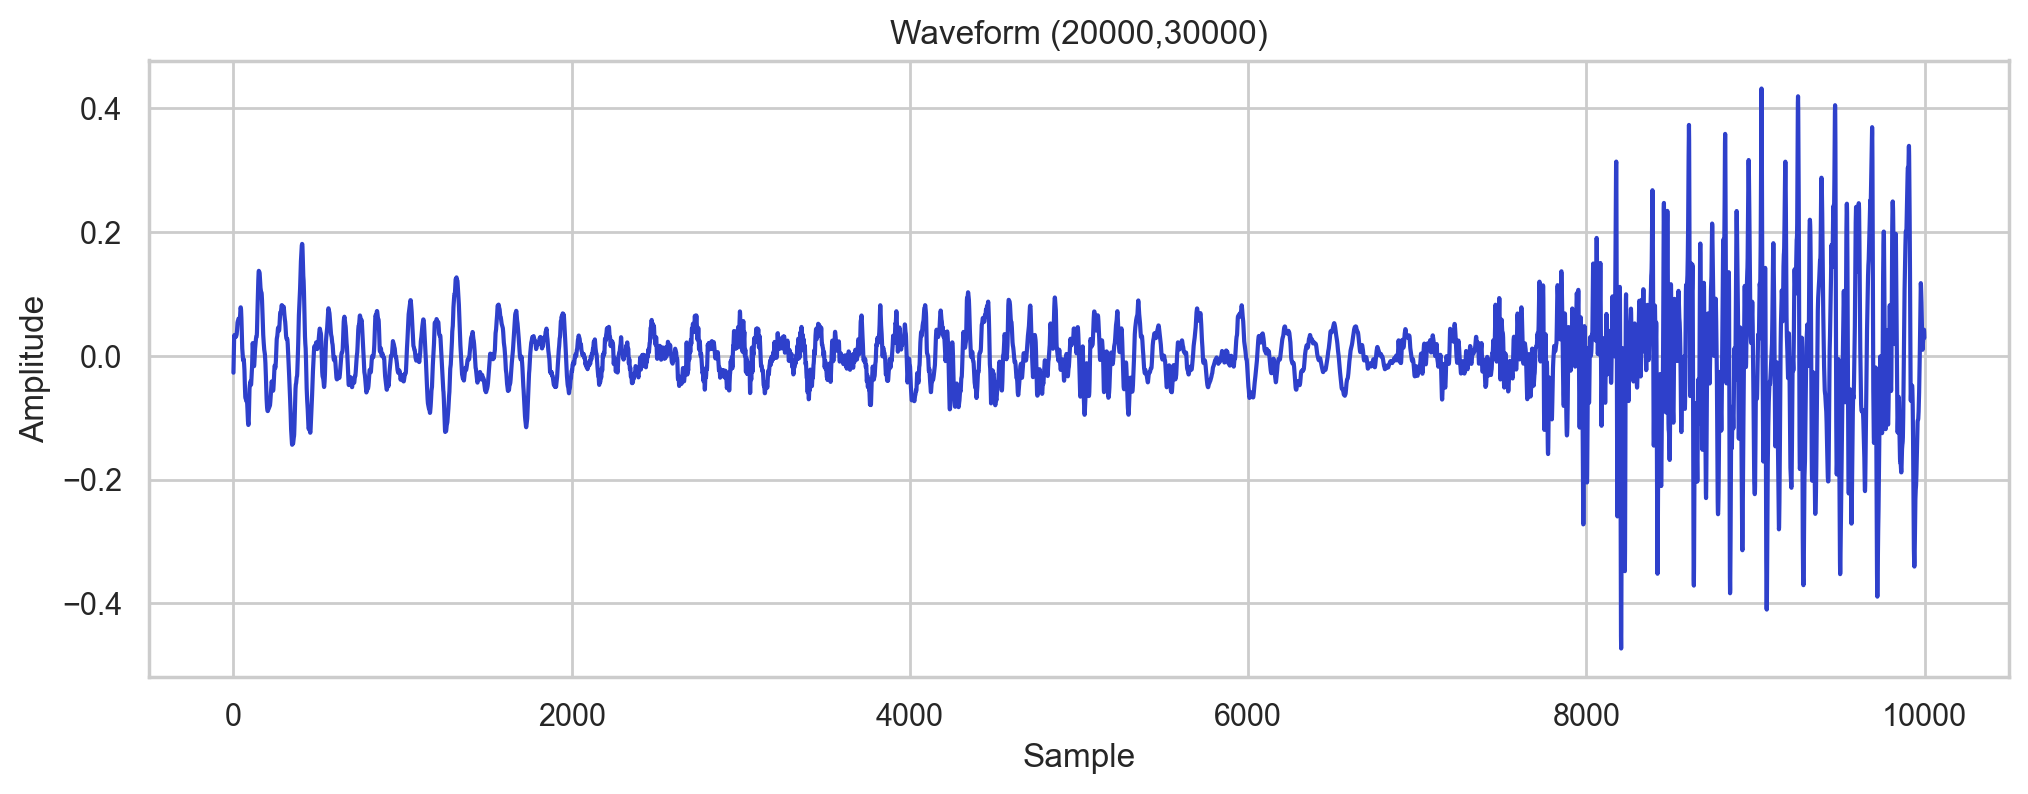

In [34]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:30000], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (20000,30000)')
plt.show()

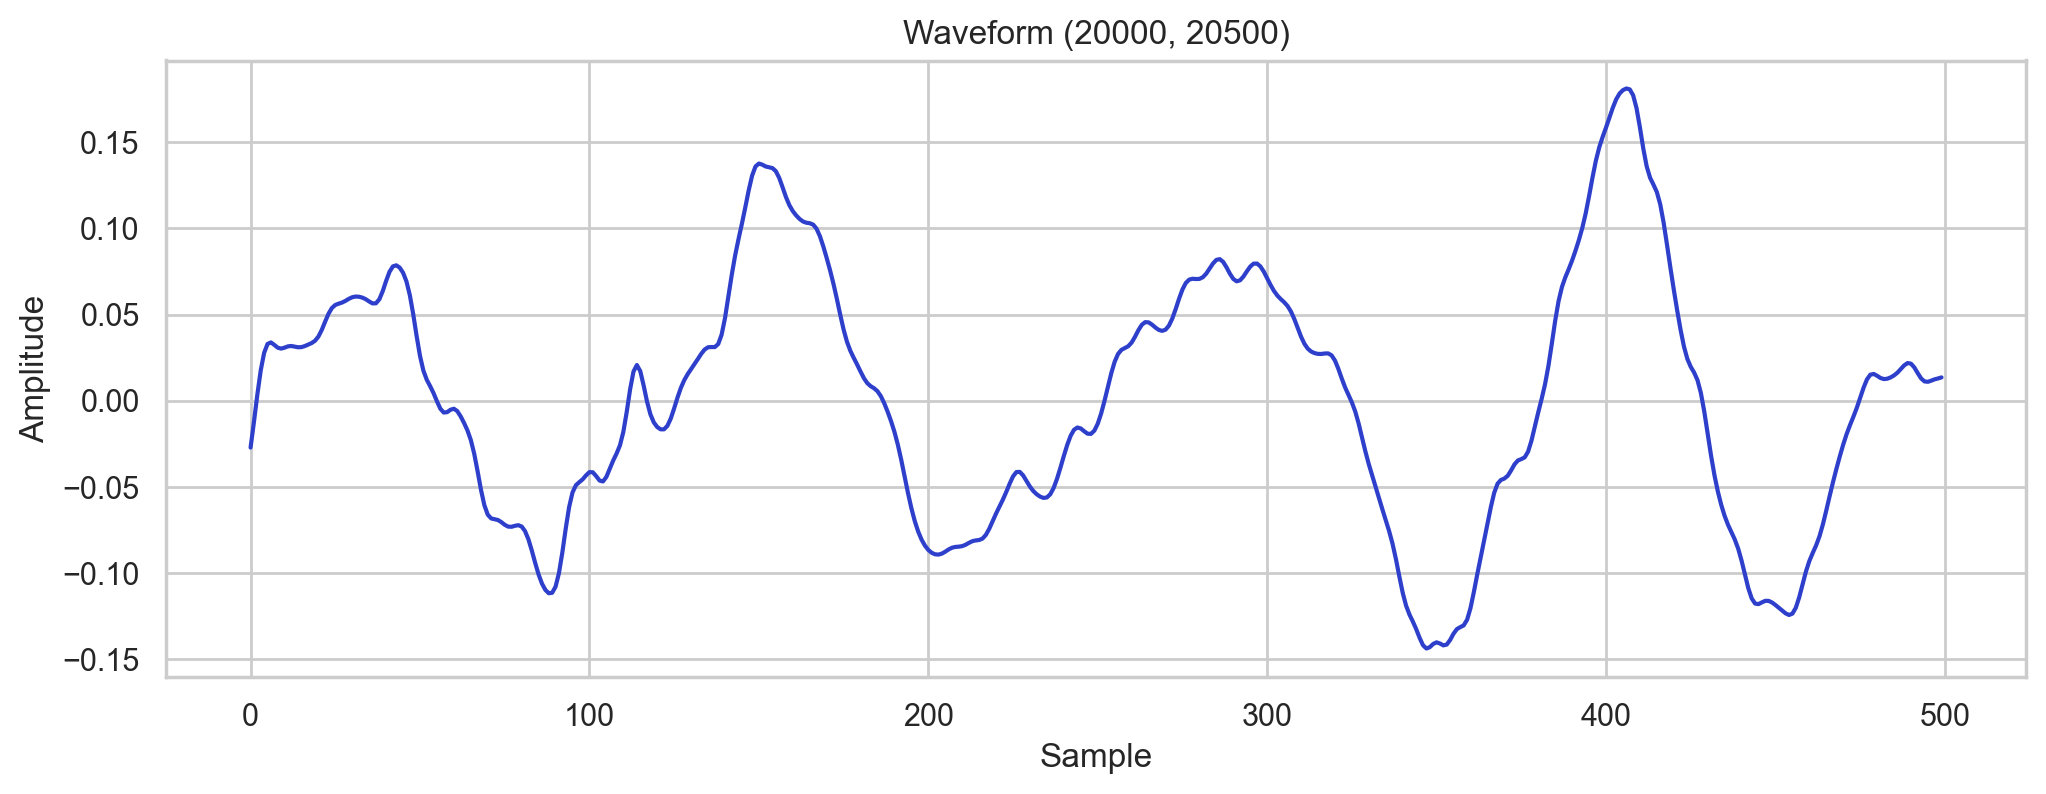

In [35]:
plt.figure(figsize=(12, 4), dpi=200)
plt.plot(happy_arr.iloc[0][20000:20500], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform (20000, 20500)')
plt.show()

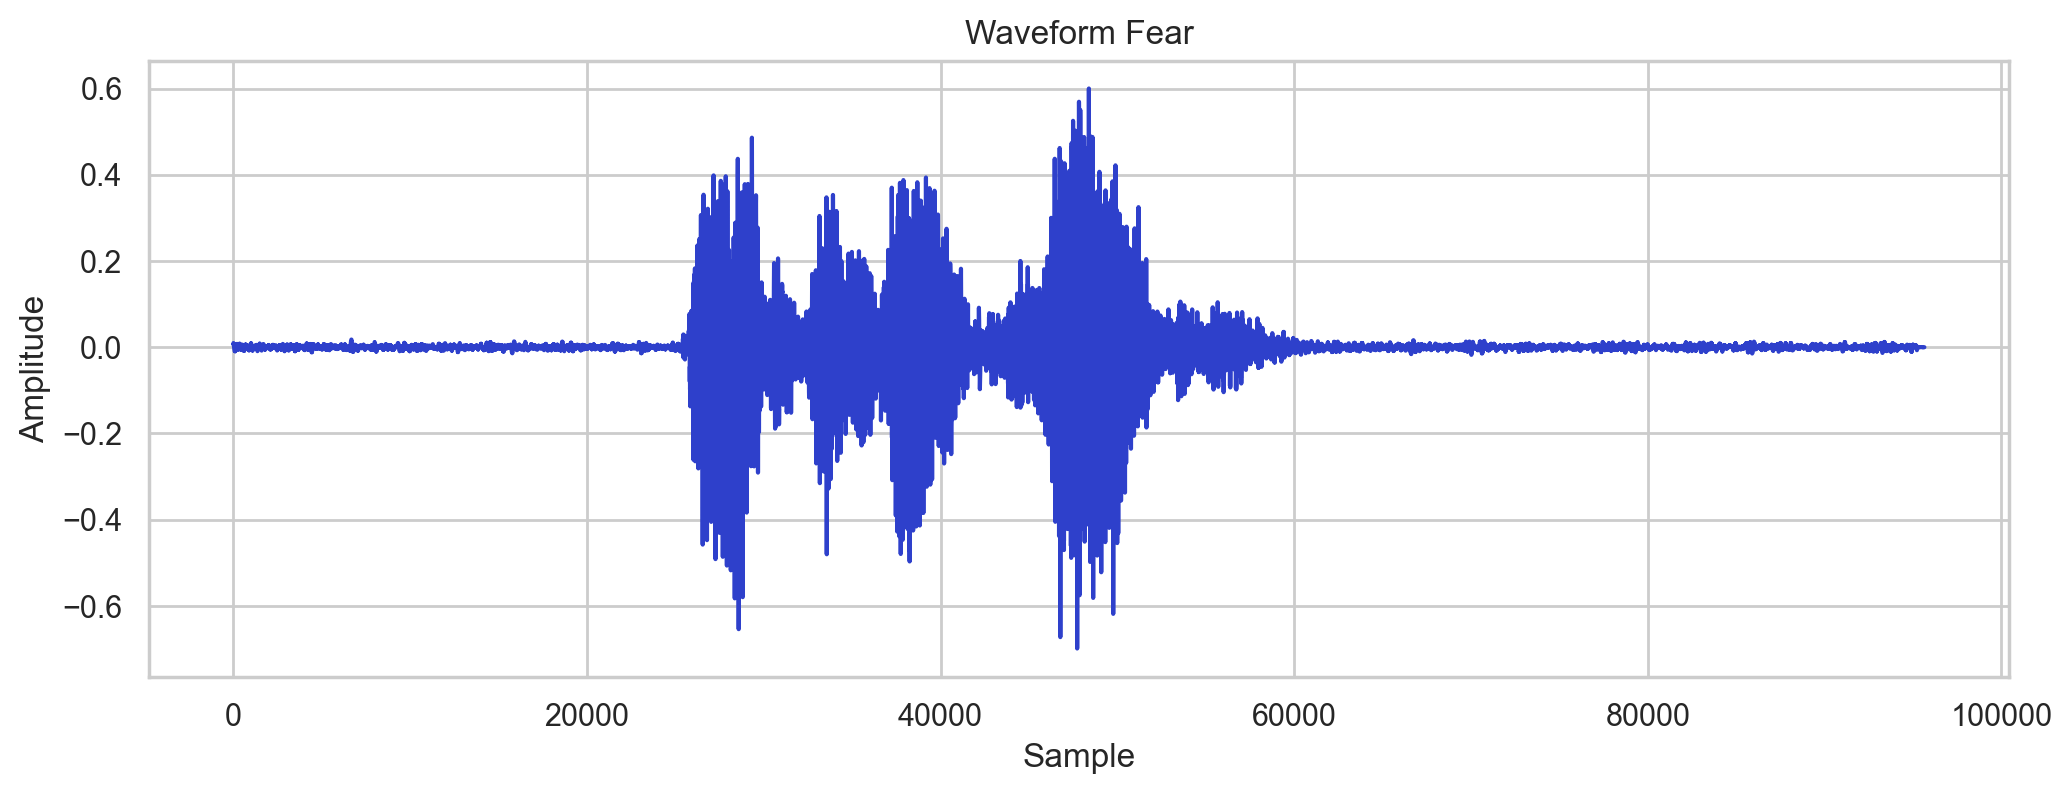

In [36]:
fear_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Path']
fear_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'fear']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(fear_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Fear')
plt.show()

Audio(fear_sp.iloc[0])

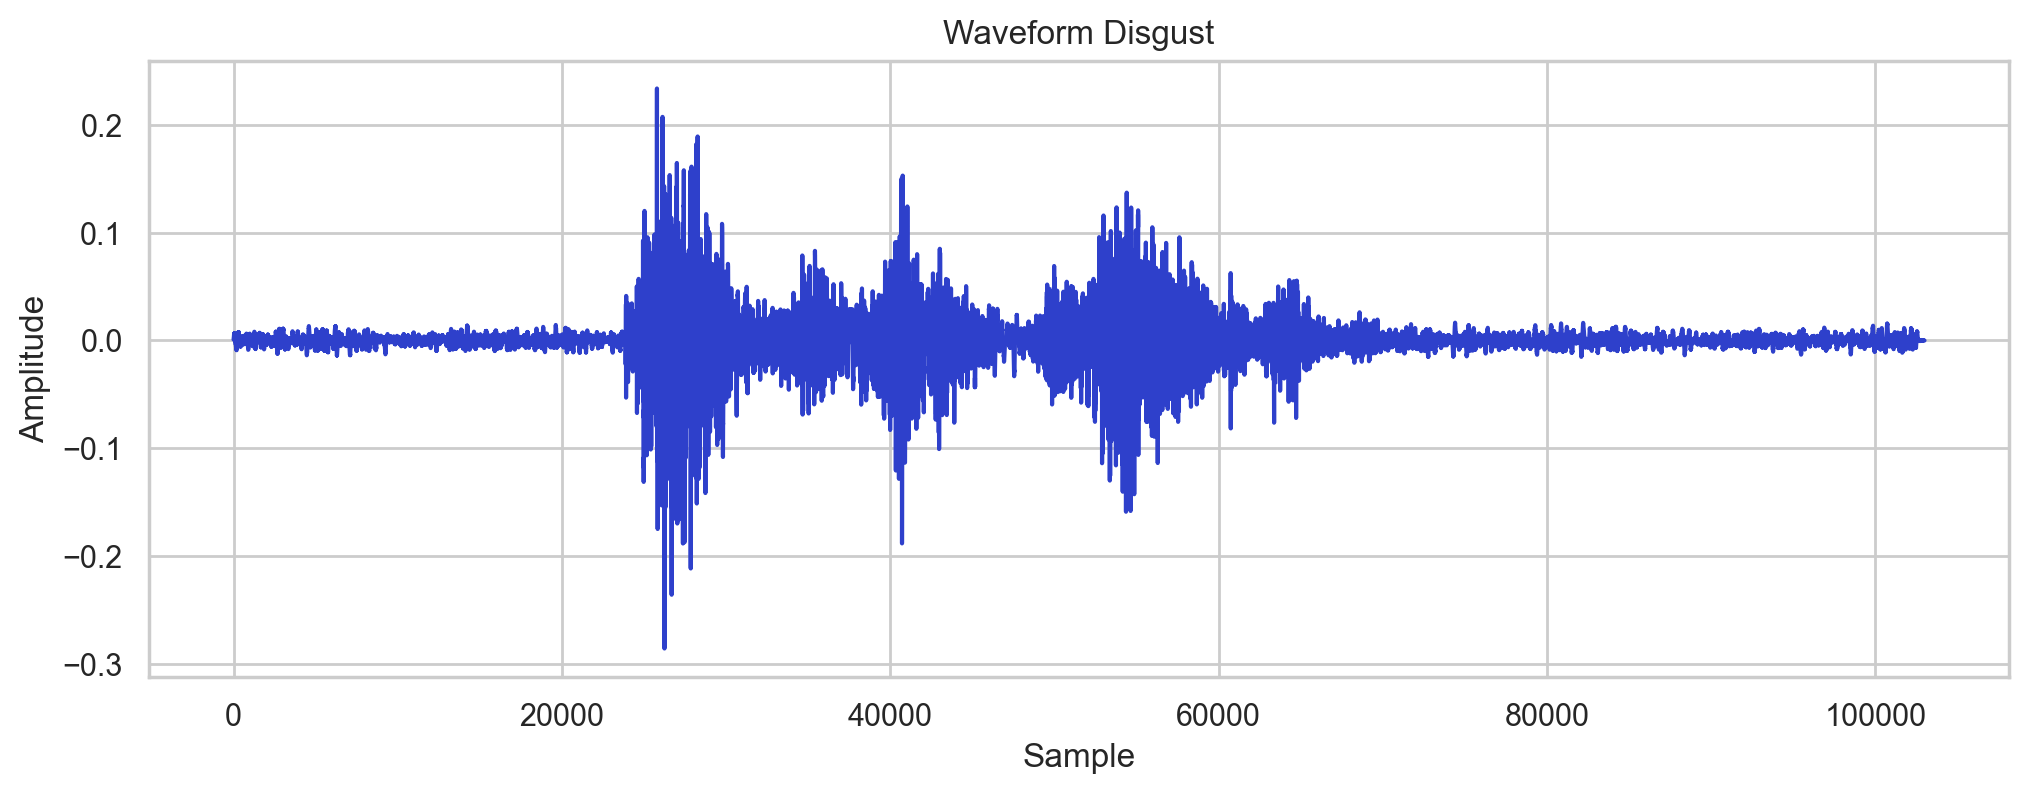

In [37]:
disgust_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Path']
disgust_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'disgust']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(disgust_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Disgust')
plt.show()


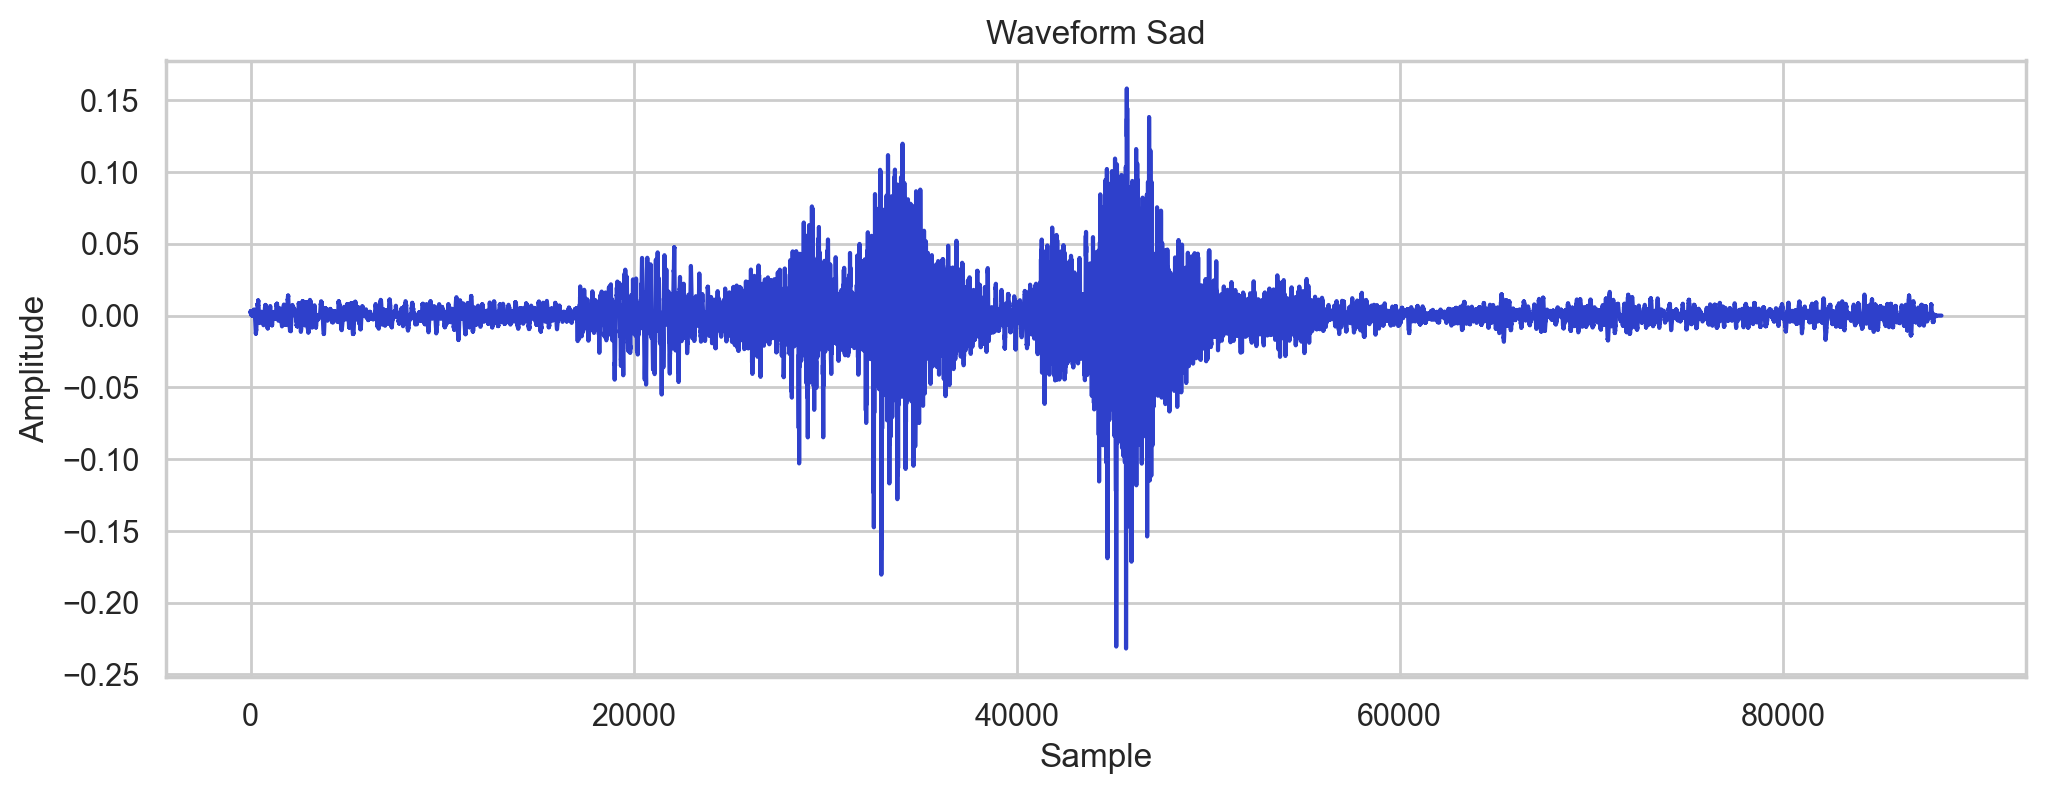

In [38]:
sad_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Path']
sad_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'sad']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(sad_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Sad')
plt.show()

Audio(sad_sp.iloc[0])

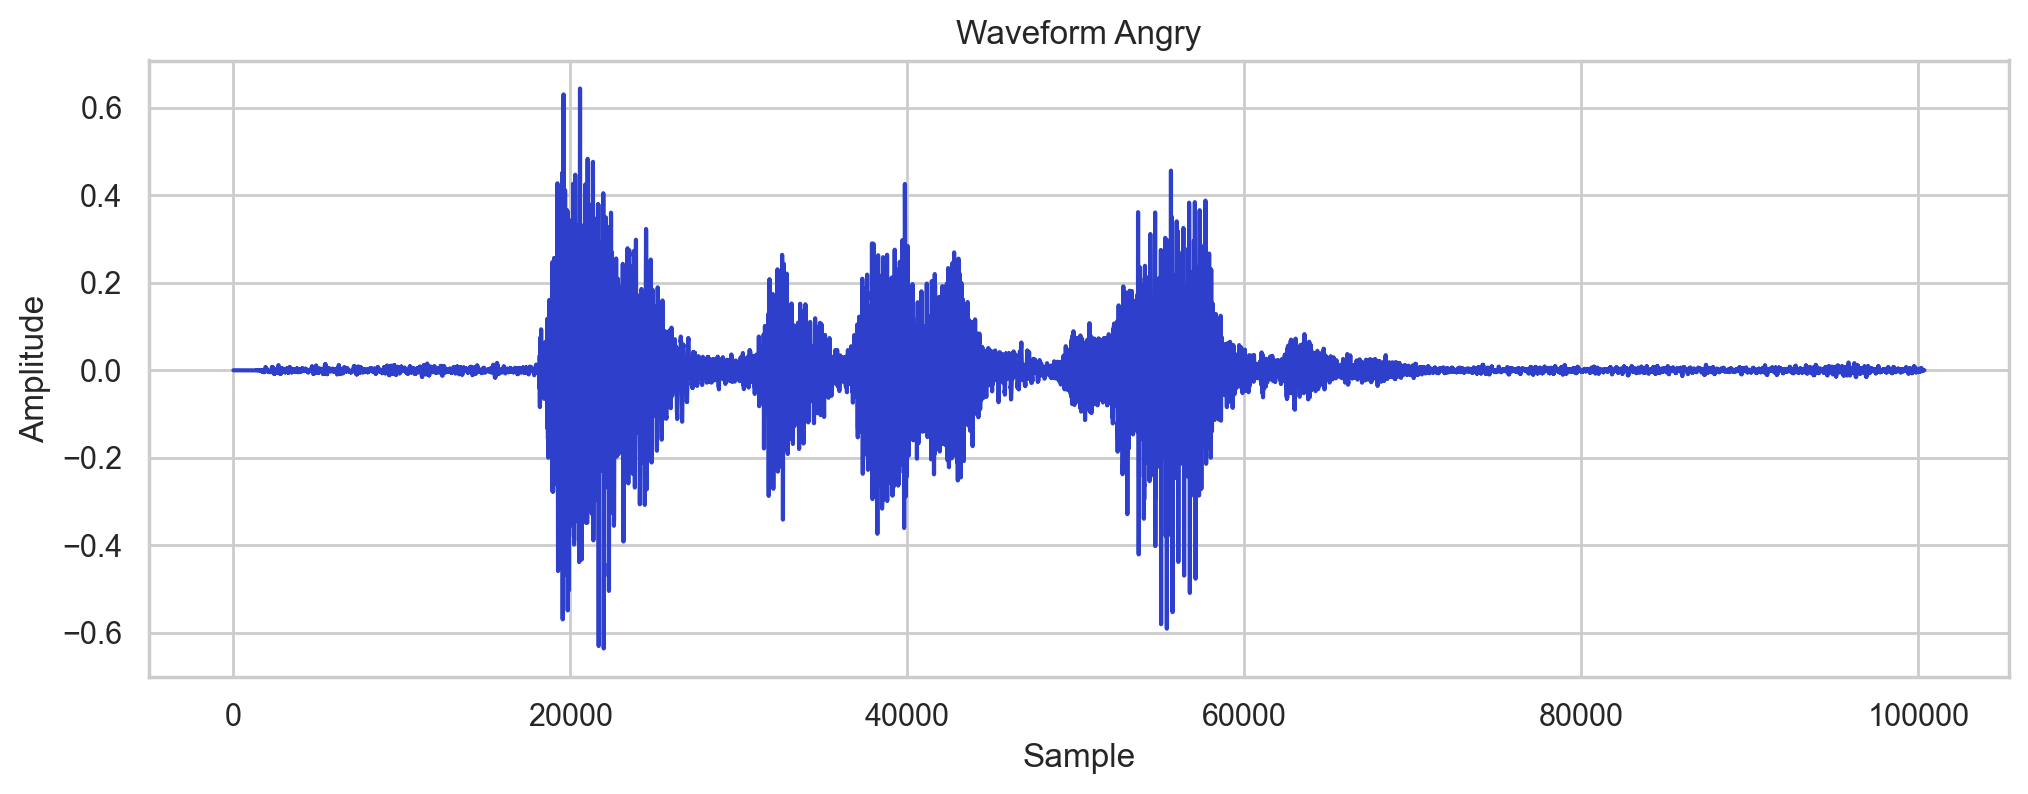

In [39]:
angry_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Path']
angry_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'angry']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(angry_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Angry')
plt.show()

Audio(angry_sp.iloc[0])

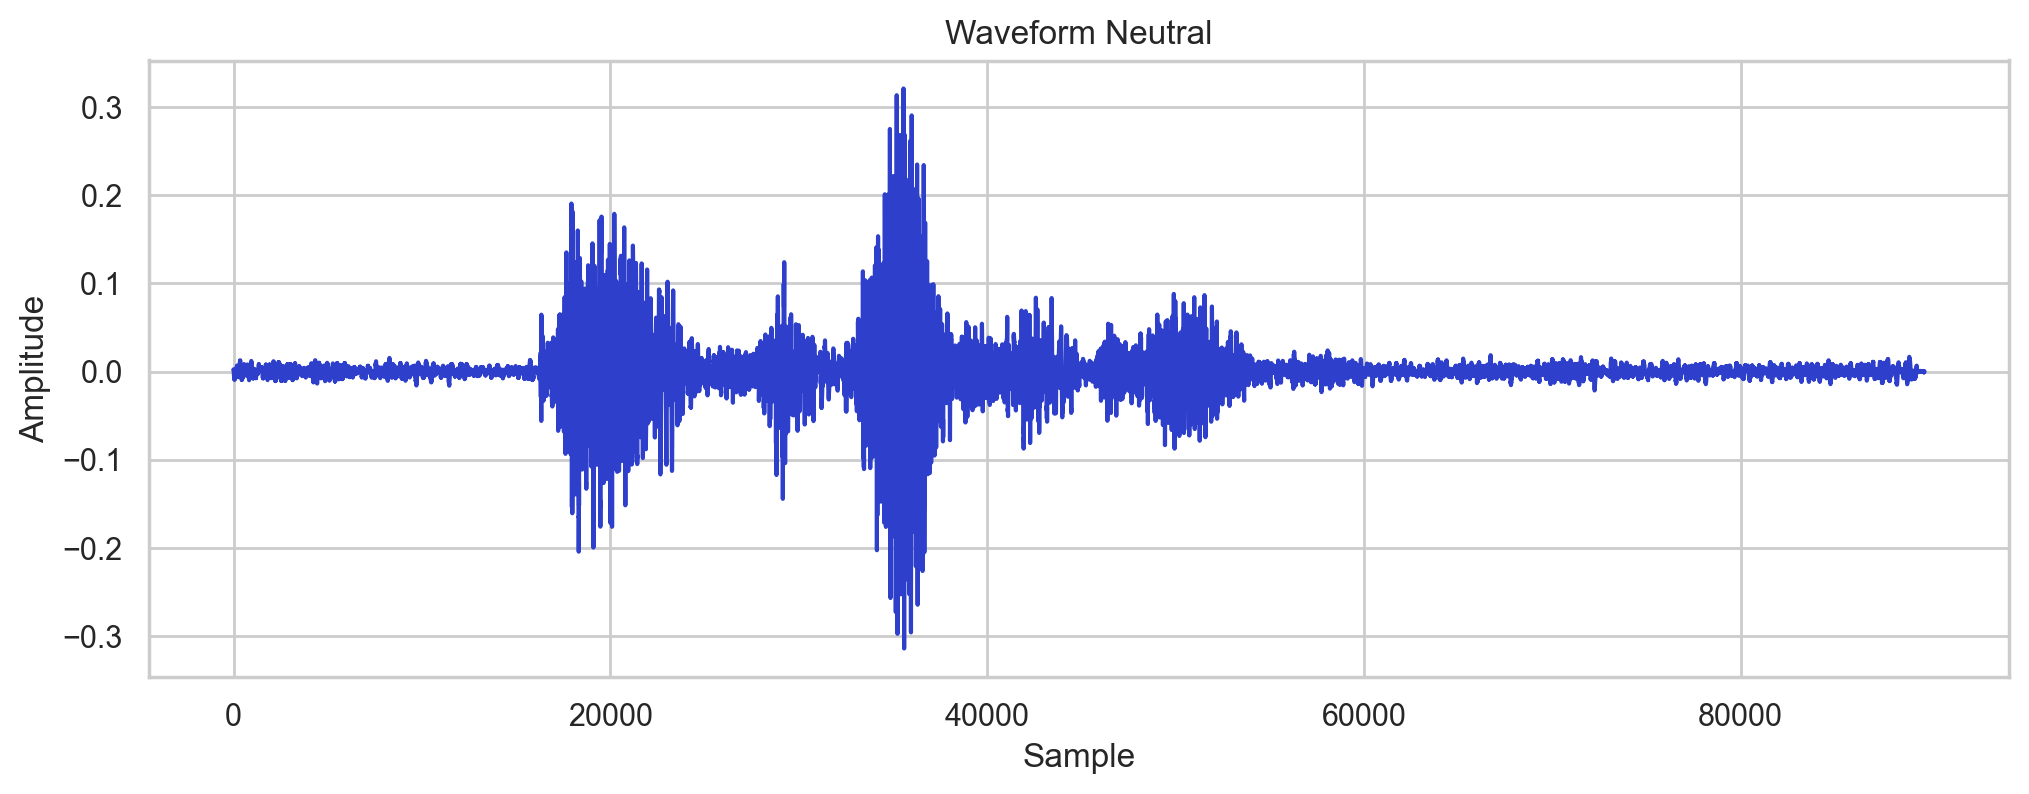

In [40]:
neutral_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Path']
neutral_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'neutral']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(neutral_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Neutral')
plt.show()

Audio(neutral_sp.iloc[0])

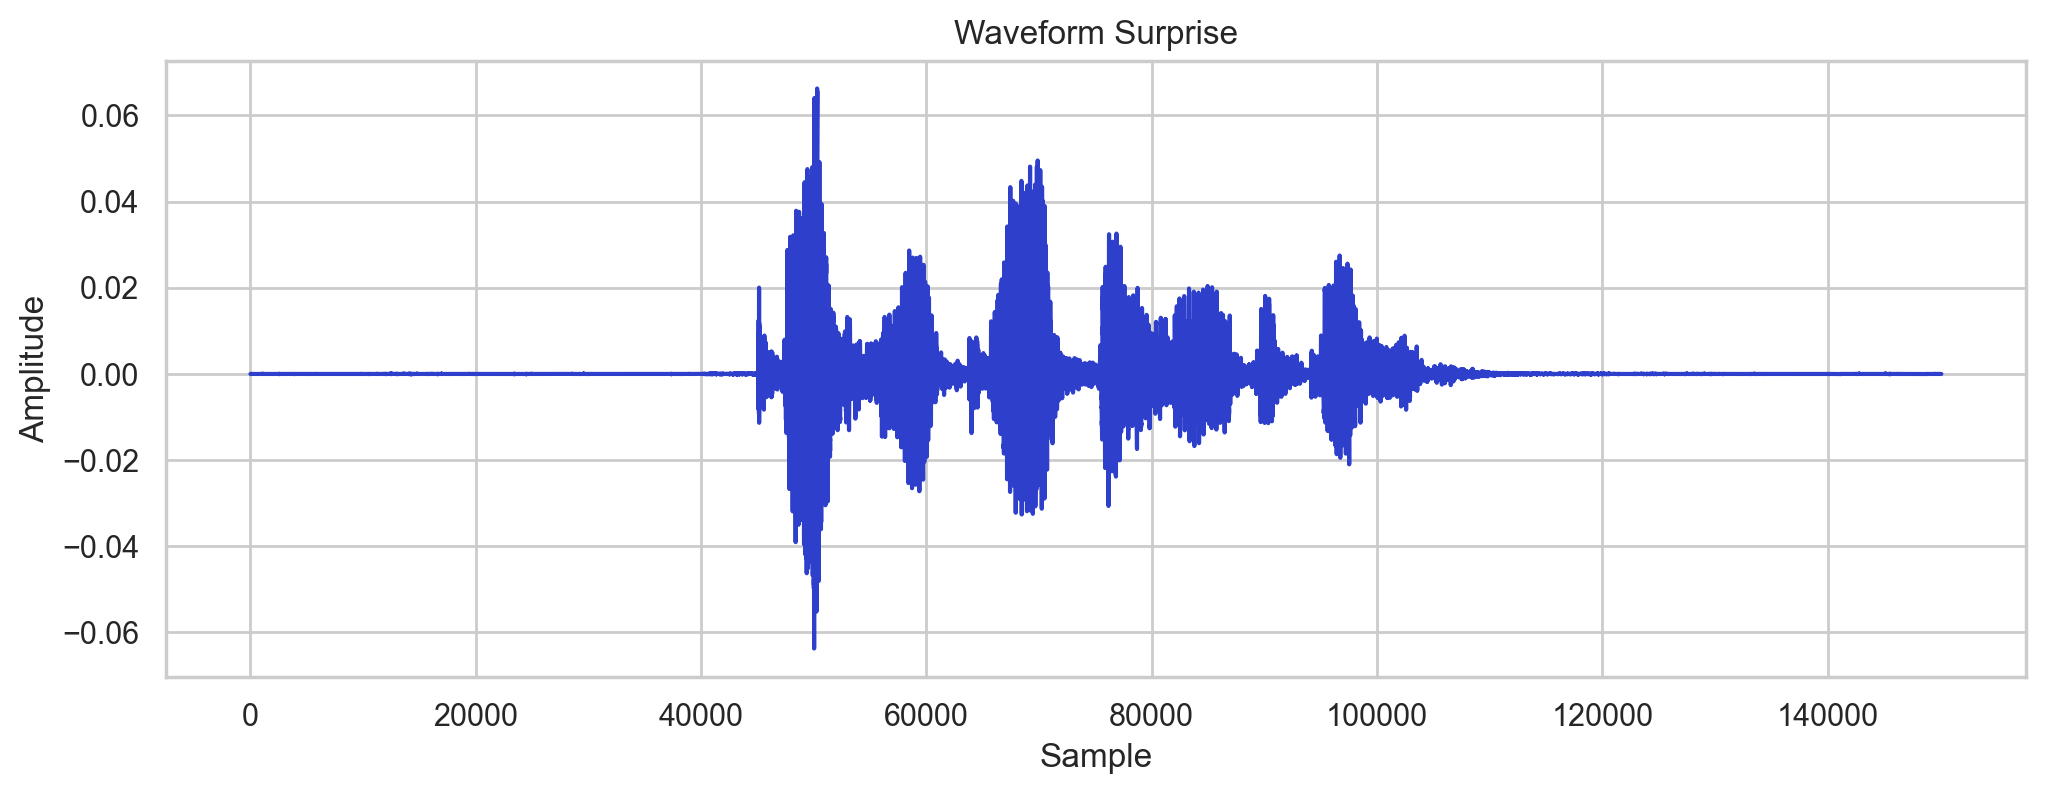

In [41]:
surprise_sp = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Path']
surprise_arr = Sum_df_rep[Sum_df_rep['Emotions'] == 'surprise']['Arrays']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(surprise_arr.iloc[0], color='#2E40CB')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Waveform Surprise')
plt.show()

Audio(surprise_sp.iloc[0])

In [42]:
Crema_df

,Emotions,Path
0,angry,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
1,disgust,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
2,fear,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
3,happy,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
4,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
...,...,...
7437,disgust,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
7438,fear,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
7439,happy,C:/Users/Samruddhi/Desktop/codealpha/speech_em...
7440,neutral,C:/Users/Samruddhi/Desktop/codealpha/speech_em...


2- Extract mfcc

Mel-frequency cepstral coefficients (MFCC) are a feature extraction technique widely used in speech and audio processing.

In [43]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y = y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [44]:
extract_mfcc(Crema_df['Path'][0])

array([-3.24209656e+02,  1.28394699e+02, -1.93607731e+01,  4.53538857e+01,
       -7.78105974e+00,  1.68013134e+01, -2.51367245e+01, -2.04265022e+00,
       -1.27364416e+01, -6.02622867e-01, -1.28936062e+01, -1.98712718e+00,
       -2.58807540e+00, -1.62106018e+01,  1.14225855e+01, -1.46565952e+01,
       -4.79401112e+00, -4.49503183e+00, -2.26494476e-01, -1.00507975e+01,
       -6.20419693e+00, -4.91127634e+00, -8.64876366e+00, -1.61911917e+00,
       -5.56142187e+00,  3.72061515e+00, -6.35995150e+00,  1.27186224e-01,
       -3.51279044e+00, -1.81078887e+00, -1.86421144e+00, -2.11952138e+00,
       -1.89407498e-01, -4.19969273e+00, -3.30231285e+00, -7.45498610e+00,
       -2.41752887e+00, -5.82625246e+00, -1.81556582e+00, -3.81147480e+00],
      dtype=float32)

In [45]:
X_mfcc = Crema_df['Path'].apply(lambda x: extract_mfcc(x))

3- Array and Dimention

In speech recognition, the concept of expanding dimensions typically refers to increasing the feature space of input data. Array, speech signals are continuous waveforms.

In [46]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(7442, 40)

In [47]:
X = np.expand_dims(X, -1)
X.shape

(7442, 40, 1)

In [48]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(Crema_df[['Emotions']])

In [49]:
y = y.toarray()

1- Structure of Model

You can see the structure of LSTM in the cell below. Categorical_crossentropy for loss evaluation, ADAM as optimizer, validation split = 0.2 all of the Crema dataset, number of epochs = 500 and batchsize is 64.

In [50]:

from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from collections.abc import Iterable

from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization
from keras import layers, callbacks


In [51]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,734 (1.17 MB)

 Trainable params: 305,734 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
checkpoint_filepath = 'best_model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
lr_scheduler_callback = LearningRateScheduler(scheduler)

history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=64)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.9108 - loss: 0.2463 - val_accuracy: 0.3365 - val_loss: 4.9213
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9216 - loss: 0.2333 - val_accuracy: 0.3418 - val_loss: 4.5778
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.9011 - loss: 0.3071 - val_accuracy: 0.3338 - val_loss: 4.4328
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.9249 - loss: 0.2147 - val_accuracy: 0.3358 - val_loss: 4.8768
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 96ms/step - accuracy: 0.8577 - loss: 0.4350 - val_accuracy: 0.3465 - val_loss: 4.3095
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.9215 - loss: 0.2142 - val_accuracy: 0.3371 - val_loss: 5.2021
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 97ms/step - accuracy: 0.8171 - loss: 0.6107 - val_accuracy: 0.3378 - val_loss: 3.8017
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - accuracy: 0.9291 - loss: 0.2071 - val_accu

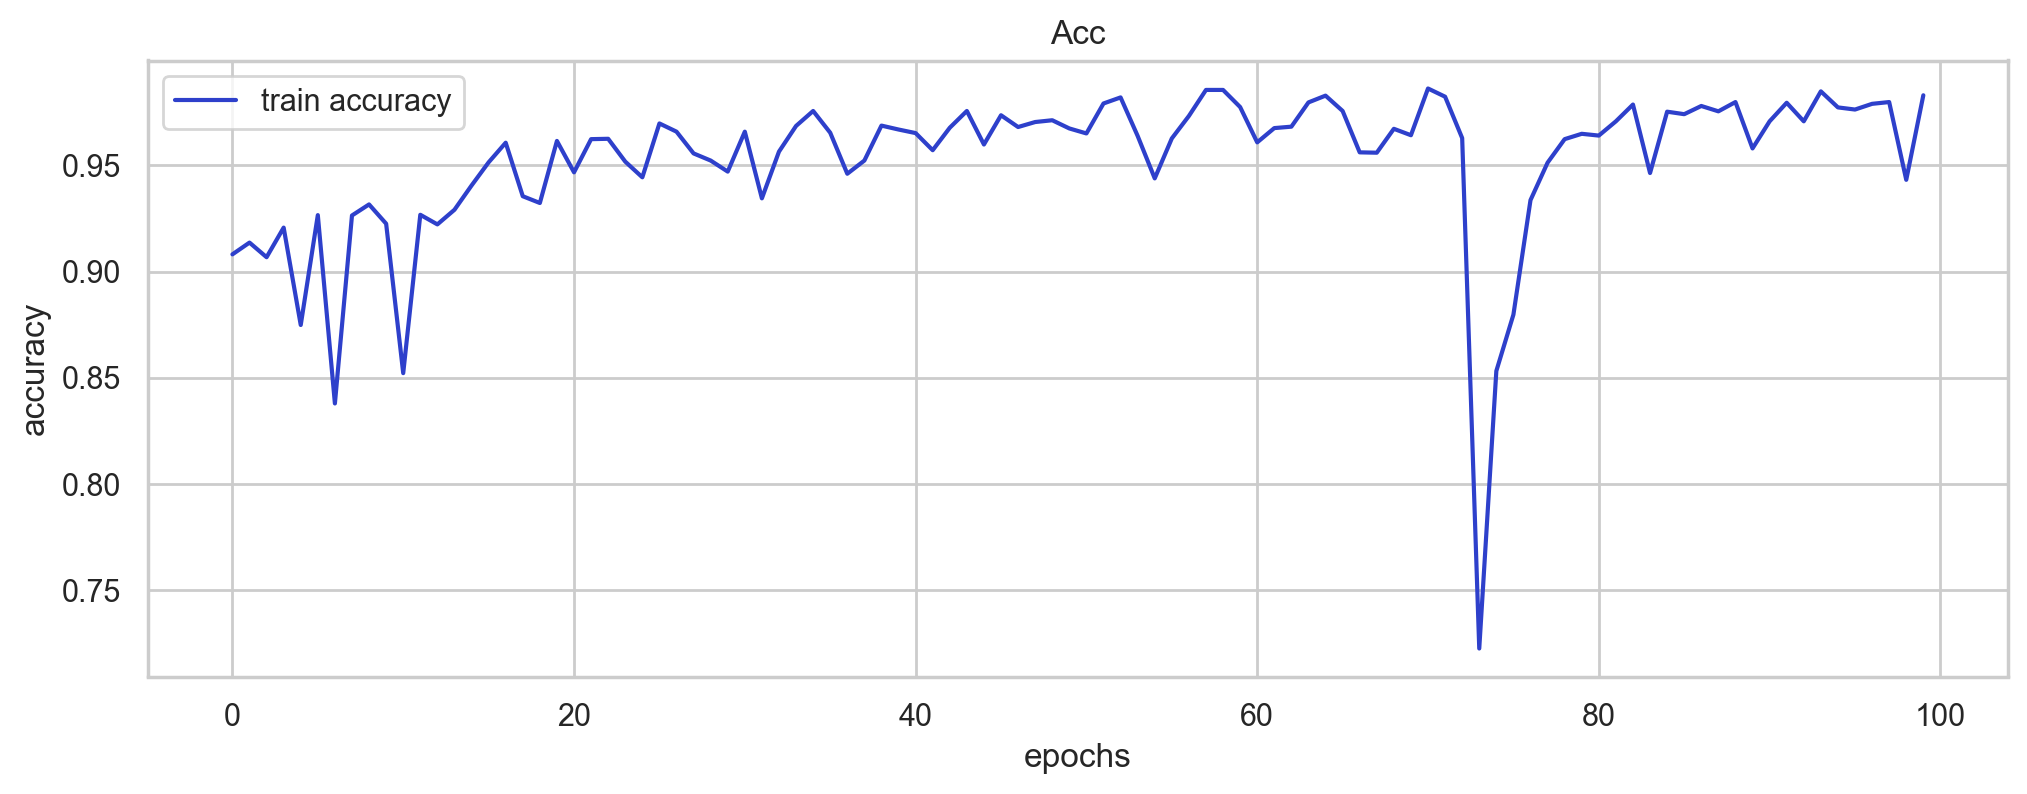

In [54]:
epochs = list(range(100))
acc = history.history['accuracy']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, acc, label='train accuracy', color='#2E40CB')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Acc')
plt.legend()
plt.show()


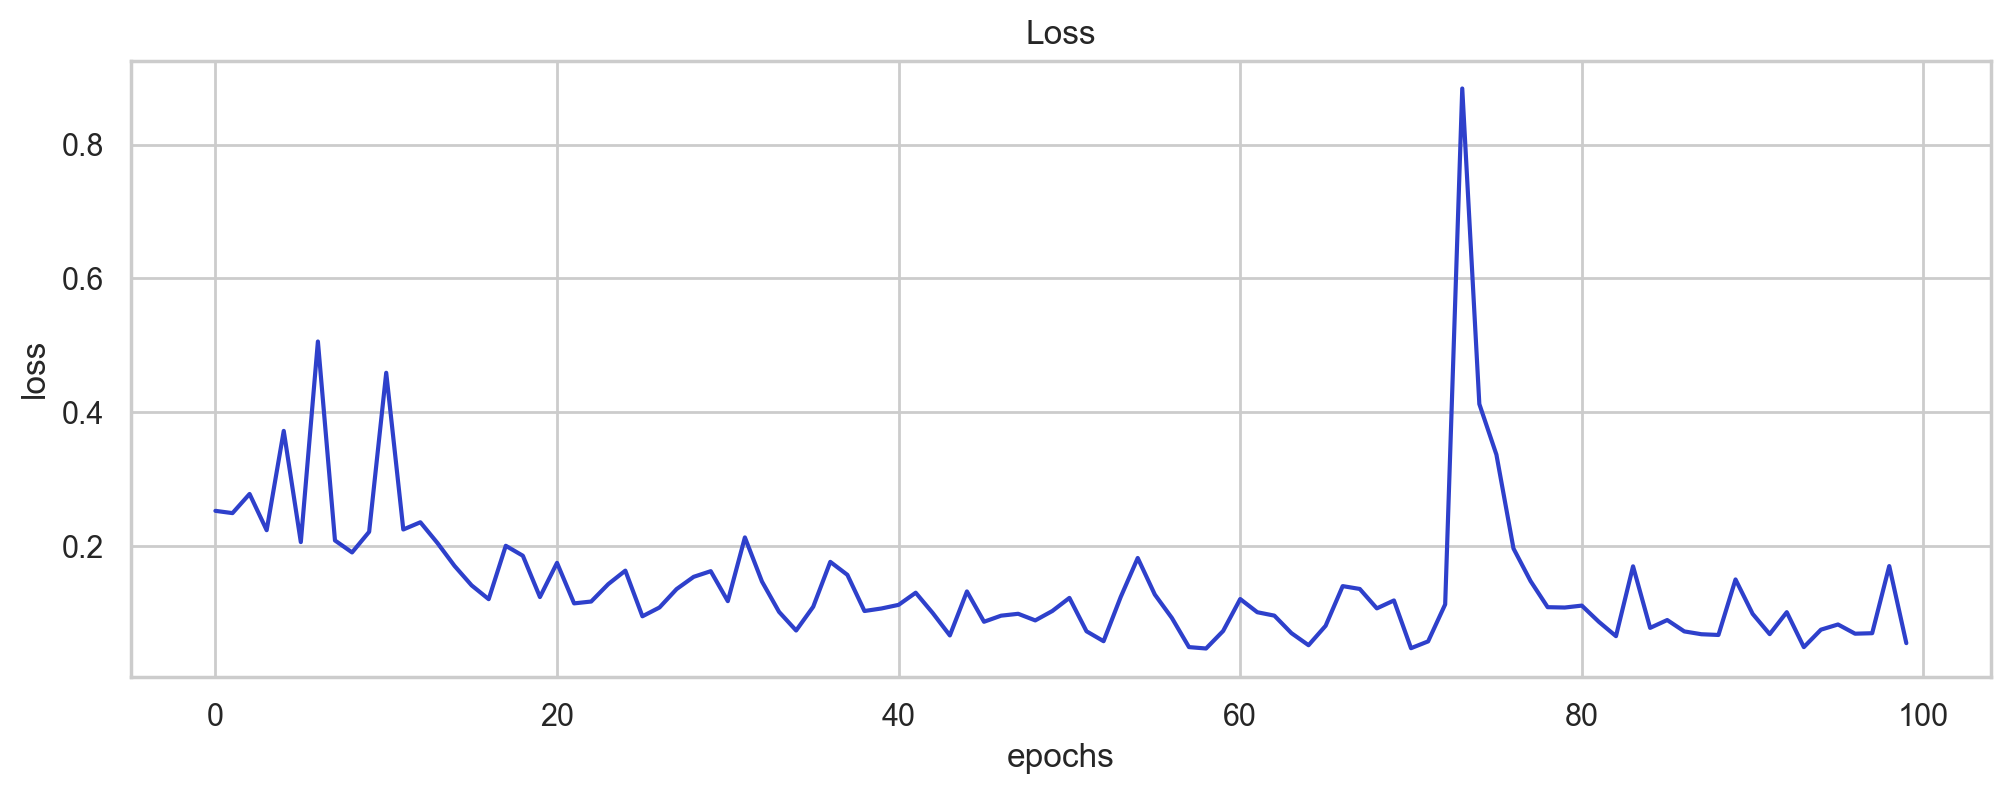

In [56]:
loss = history.history['loss']

plt.figure(figsize=(12, 4), dpi=200)
plt.plot(epochs, loss, label='train loss', color='#2E40CB')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()